In [1]:
from pyspark.sql import SparkSession
# from pyspark.sql.types import *
# from pyspark.sql.functions import *
from pyspark.ml.feature import VectorAssembler
from ai.h2o.sparkling.H2OContext import H2OContext
from pysparkling.context import H2OContext
import numpy as np
import pandas as pd

In [2]:
spark = SparkSession.builder.appName("H2O").getOrCreate()

In [3]:
hc = H2OContext.getOrCreate()

Connecting to H2O server at http://ajays-air:54323 ... successful.


H2O_cluster_uptime:,20 secs
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.3
H2O_cluster_version_age:,2 months and 15 days
H2O_cluster_name:,sparkling-water-aj_local-1628051147706
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,503.1 Mb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"



Sparkling Water Context:
 * Sparkling Water Version: 3.32.1.3-1-3.0
 * H2O name: sparkling-water-aj_local-1628051147706
 * cluster size: 1
 * list of used nodes:
  (executorId, host, port)
  ------------------------
  (0,192.168.43.37,54321)
  ------------------------

  Open H2O Flow in browser: http://ajays-air:54323 (CMD + click in Mac OSX)

    


In [4]:
from pysparkling.ml import H2OAutoMLClassifier

In [5]:
df = spark.read.csv("./Data/glass.csv", header=True, inferSchema=True)
df.show()
#mode = PERMISSIVE, DROPMALFORMED, and FAILFAST.

+-----+-------+-----+----+----+-----+----+----+---+----+----+
|Index|     ri|   na|  mg|  al|   si|   k|  ca| ba|  fe|type|
+-----+-------+-----+----+----+-----+----+----+---+----+----+
|    1|1.52101|13.64|4.49| 1.1|71.78|0.06|8.75|0.0| 0.0|   1|
|    2|1.51761|13.89| 3.6|1.36|72.73|0.48|7.83|0.0| 0.0|   1|
|    3|1.51618|13.53|3.55|1.54|72.99|0.39|7.78|0.0| 0.0|   1|
|    4|1.51766|13.21|3.69|1.29|72.61|0.57|8.22|0.0| 0.0|   1|
|    5|1.51742|13.27|3.62|1.24|73.08|0.55|8.07|0.0| 0.0|   1|
|    6|1.51596|12.79|3.61|1.62|72.97|0.64|8.07|0.0|0.26|   1|
|    7|1.51743| 13.3| 3.6|1.14|73.09|0.58|8.17|0.0| 0.0|   1|
|    8|1.51756|13.15|3.61|1.05|73.24|0.57|8.24|0.0| 0.0|   1|
|    9|1.51918|14.04|3.58|1.37|72.08|0.56| 8.3|0.0| 0.0|   1|
|   10|1.51755| 13.0| 3.6|1.36|72.99|0.57| 8.4|0.0|0.11|   1|
|   11|1.51571|12.72|3.46|1.56| 73.2|0.67|8.09|0.0|0.24|   1|
|   12|1.51763| 12.8|3.66|1.27|73.01| 0.6|8.56|0.0| 0.0|   1|
|   13|1.51589|12.88|3.43| 1.4|73.28|0.69|8.05|0.0|0.24|   1|
|   14|1

In [6]:
df = df.na.drop()

In [7]:
df.show()

+-----+-------+-----+----+----+-----+----+----+---+----+----+
|Index|     ri|   na|  mg|  al|   si|   k|  ca| ba|  fe|type|
+-----+-------+-----+----+----+-----+----+----+---+----+----+
|    1|1.52101|13.64|4.49| 1.1|71.78|0.06|8.75|0.0| 0.0|   1|
|    2|1.51761|13.89| 3.6|1.36|72.73|0.48|7.83|0.0| 0.0|   1|
|    3|1.51618|13.53|3.55|1.54|72.99|0.39|7.78|0.0| 0.0|   1|
|    4|1.51766|13.21|3.69|1.29|72.61|0.57|8.22|0.0| 0.0|   1|
|    5|1.51742|13.27|3.62|1.24|73.08|0.55|8.07|0.0| 0.0|   1|
|    6|1.51596|12.79|3.61|1.62|72.97|0.64|8.07|0.0|0.26|   1|
|    7|1.51743| 13.3| 3.6|1.14|73.09|0.58|8.17|0.0| 0.0|   1|
|    8|1.51756|13.15|3.61|1.05|73.24|0.57|8.24|0.0| 0.0|   1|
|    9|1.51918|14.04|3.58|1.37|72.08|0.56| 8.3|0.0| 0.0|   1|
|   10|1.51755| 13.0| 3.6|1.36|72.99|0.57| 8.4|0.0|0.11|   1|
|   11|1.51571|12.72|3.46|1.56| 73.2|0.67|8.09|0.0|0.24|   1|
|   12|1.51763| 12.8|3.66|1.27|73.01| 0.6|8.56|0.0| 0.0|   1|
|   13|1.51589|12.88|3.43| 1.4|73.28|0.69|8.05|0.0|0.24|   1|
|   14|1

In [8]:
df = df.drop("Index")

In [9]:
df.columns[:-1]

['ri', 'na', 'mg', 'al', 'si', 'k', 'ca', 'ba', 'fe']

In [10]:
df.groupBy("type").count().show()

+----+-----+
|type|count|
+----+-----+
|   1|   70|
|   0|   76|
+----+-----+



In [11]:
feature_assembler = VectorAssembler(inputCols=df.columns[:-1], outputCol="feature")

In [12]:
df = feature_assembler.transform(df)


In [13]:
df.show()

+-------+-----+----+----+-----+----+----+---+----+----+--------------------+
|     ri|   na|  mg|  al|   si|   k|  ca| ba|  fe|type|             feature|
+-------+-----+----+----+-----+----+----+---+----+----+--------------------+
|1.52101|13.64|4.49| 1.1|71.78|0.06|8.75|0.0| 0.0|   1|[1.52101,13.64,4....|
|1.51761|13.89| 3.6|1.36|72.73|0.48|7.83|0.0| 0.0|   1|[1.51761,13.89,3....|
|1.51618|13.53|3.55|1.54|72.99|0.39|7.78|0.0| 0.0|   1|[1.51618,13.53,3....|
|1.51766|13.21|3.69|1.29|72.61|0.57|8.22|0.0| 0.0|   1|[1.51766,13.21,3....|
|1.51742|13.27|3.62|1.24|73.08|0.55|8.07|0.0| 0.0|   1|[1.51742,13.27,3....|
|1.51596|12.79|3.61|1.62|72.97|0.64|8.07|0.0|0.26|   1|[1.51596,12.79,3....|
|1.51743| 13.3| 3.6|1.14|73.09|0.58|8.17|0.0| 0.0|   1|[1.51743,13.3,3.6...|
|1.51756|13.15|3.61|1.05|73.24|0.57|8.24|0.0| 0.0|   1|[1.51756,13.15,3....|
|1.51918|14.04|3.58|1.37|72.08|0.56| 8.3|0.0| 0.0|   1|[1.51918,14.04,3....|
|1.51755| 13.0| 3.6|1.36|72.99|0.57| 8.4|0.0|0.11|   1|[1.51755,13.0,3.6...|

In [14]:
df.summary()

DataFrame[summary: string, ri: string, na: string, mg: string, al: string, si: string, k: string, ca: string, ba: string, fe: string, type: string]

In [15]:
df.printSchema()

root
 |-- ri: double (nullable = true)
 |-- na: double (nullable = true)
 |-- mg: double (nullable = true)
 |-- al: double (nullable = true)
 |-- si: double (nullable = true)
 |-- k: double (nullable = true)
 |-- ca: double (nullable = true)
 |-- ba: double (nullable = true)
 |-- fe: double (nullable = true)
 |-- type: integer (nullable = true)
 |-- feature: vector (nullable = true)



In [5]:
train,test = df.select(["feature","type"]).randomSplit([.7,.3])

NameError: name 'df' is not defined

In [17]:
train.show()

+--------------------+----+
|             feature|type|
+--------------------+----+
|[1.51215,12.99,3....|   1|
|[1.51569,13.24,3....|   0|
|[1.51588,13.12,3....|   0|
|[1.5159,12.82,3.5...|   0|
|[1.5159,13.02,3.5...|   0|
|[1.5159,13.24,3.3...|   0|
|[1.51592,12.86,3....|   0|
|[1.51593,13.09,3....|   0|
|[1.51593,13.25,3....|   0|
|[1.51594,13.09,3....|   0|
|[1.51596,12.79,3....|   1|
|[1.51613,13.92,3....|   0|
|[1.51618,13.53,3....|   1|
|[1.51625,13.36,3....|   0|
|[1.51627,13.0,3.5...|   0|
|[1.51629,12.71,3....|   0|
|[1.51631,13.34,3....|   0|
|[1.5164,12.55,3.4...|   0|
|[1.51645,13.4,3.4...|   0|
|[1.51645,13.44,3....|   0|
+--------------------+----+
only showing top 20 rows



In [18]:
automl = H2OAutoMLClassifier(labelCol="type", maxModels=5, includeAlgos=['XGBoost'], maxRuntimeSecs=60)
automl

H2OAutoMLClassifier_b20829e49852

In [19]:
model = automl.fit(train)

In [20]:
automl

H2OAutoMLClassifier_b20829e49852

In [21]:
model

XGBoost_3_AutoML_20210720_222422_23a36a9a3c6e

In [22]:
print(model.getModelDetails())

{
  "names": [
    "feature.0",
    "feature.1",
    "feature.2",
    "feature.3",
    "feature.4",
    "feature.5",
    "feature.6",
    "feature.7",
    "feature.8",
    "type"
  ],
  "column_types": [
    "Numeric",
    "Numeric",
    "Numeric",
    "Numeric",
    "Numeric",
    "Numeric",
    "Numeric",
    "Numeric",
    "Numeric",
    "Enum"
  ],
  "cross_validation_predictions": [
    {
      "name": "prediction_XGBoost_3_AutoML_20210720_222422_cv_1",
      "type": "Key\u003cFrame\u003e",
      "URL": "/3/Frames/prediction_XGBoost_3_AutoML_20210720_222422_cv_1"
    },
    {
      "name": "prediction_XGBoost_3_AutoML_20210720_222422_cv_2",
      "type": "Key\u003cFrame\u003e",
      "URL": "/3/Frames/prediction_XGBoost_3_AutoML_20210720_222422_cv_2"
    },
    {
      "name": "prediction_XGBoost_3_AutoML_20210720_222422_cv_3",
      "type": "Key\u003cFrame\u003e",
      "URL": "/3/Frames/prediction_XGBoost_3_AutoML_20210720_222422_cv_3"
    },
    {
      "name": "prediction_XGBo

}


In [23]:
# model.transform(testingDF).show(truncate = False)
leaderboard = automl.getLeaderboard("ALL").show()

+---+--------------------+------------------+-------------------+------------------+--------------------+-------------------+-------------------+----------------+-----------------------+-------+
|   |            model_id|               auc|            logloss|             aucpr|mean_per_class_error|               rmse|                mse|training_time_ms|predict_time_per_row_ms|   algo|
+---+--------------------+------------------+-------------------+------------------+--------------------+-------------------+-------------------+----------------+-----------------------+-------+
|  0|XGBoost_3_AutoML_...|0.8719135802469137|0.44781050897104036|0.8775885107790341|  0.2349537037037037|0.38228518263321354|0.14614196086090944|             277|                   null|XGBoost|
|  1|XGBoost_1_AutoML_...| 0.711033950617284| 0.6187591726829852|0.6205632293106306|  0.2789351851851852|0.46349084105678096|0.21482375974352216|             194|                   null|XGBoost|
|  2|XGBoost_grid__1_A...

In [24]:
# leaderboard.select("auc").show()

In [25]:
pred =  model.transform(test)
pred.show()

+--------------------+----+--------------------+----------+
|             feature|type| detailed_prediction|prediction|
+--------------------+----+--------------------+----------+
|[1.51409,14.25,3....|   0|[0, [0.9783400893...|         0|
|[1.51567,13.29,3....|   1|[1, [0.2217815518...|         1|
|[1.51571,12.72,3....|   1|[0, [0.9295315146...|         0|
|[1.51574,14.86,3....|   0|[0, [0.8341600894...|         0|
|[1.51589,12.88,3....|   1|[0, [0.8980518579...|         0|
|[1.51596,13.02,3....|   0|[0, [0.9021543264...|         0|
|[1.51605,12.9,3.4...|   0|[0, [0.9035204052...|         0|
|[1.51618,13.01,3....|   0|[0, [0.8997856378...|         0|
|[1.51667,12.94,3....|   0|[1, [0.1561971306...|         1|
|[1.51673,13.3,3.6...|   0|[0, [0.9681141972...|         0|
|[1.5169,13.33,3.5...|   0|[0, [0.9565972089...|         0|
|[1.51708,13.72,3....|   0|[0, [0.9297910928...|         0|
|[1.51709,13.0,3.4...|   0|[0, [0.9418728947...|         0|
|[1.51736,12.78,3....|   1|[1, [0.081462

In [26]:
pred.take(5)

[Row(feature=DenseVector([1.5141, 14.25, 3.09, 2.08, 72.28, 1.1, 7.08, 0.0, 0.0]), type=0, detailed_prediction=Row(label='0', probabilities=Row(0=0.9783400893211365, 1=0.021659888327121735)), prediction='0'),
 Row(feature=DenseVector([1.5157, 13.29, 3.45, 1.21, 72.74, 0.56, 8.57, 0.0, 0.0]), type=1, detailed_prediction=Row(label='1', probabilities=Row(0=0.22178155183792114, 1=0.7782184481620789)), prediction='1'),
 Row(feature=DenseVector([1.5157, 12.72, 3.46, 1.56, 73.2, 0.67, 8.09, 0.0, 0.24]), type=1, detailed_prediction=Row(label='0', probabilities=Row(0=0.9295315146446228, 1=0.07046850770711899)), prediction='0'),
 Row(feature=DenseVector([1.5157, 14.86, 3.67, 1.74, 71.87, 0.16, 7.36, 0.0, 0.12]), type=0, detailed_prediction=Row(label='0', probabilities=Row(0=0.8341600894927979, 1=0.16583989560604095)), prediction='0'),
 Row(feature=DenseVector([1.5159, 12.88, 3.43, 1.4, 73.28, 0.69, 8.05, 0.0, 0.24]), type=1, detailed_prediction=Row(label='0', probabilities=Row(0=0.89805185794830

In [27]:
# pred.collect()

In [28]:
pred.select("prediction").show()

+----------+
|prediction|
+----------+
|         0|
|         1|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         1|
|         0|
|         0|
|         0|
|         0|
|         1|
|         1|
|         1|
|         1|
|         1|
|         1|
|         1|
+----------+
only showing top 20 rows



In [29]:
pred.explain()

== Physical Plan ==
*(1) Project [feature#207, type#26, UDF(struct(feature, feature#207), 0.0) AS detailed_prediction#1172, UDF(struct(feature, feature#207), 0.0).label AS prediction#1176]
+- *(1) Sample 0.7, 1.0, false, 5974889707748013333
   +- *(1) Sort [feature#207 ASC NULLS FIRST, type#26 ASC NULLS FIRST], false, 0
      +- *(1) Project [feature#207, type#26]
         +- *(1) Project [type#26, UDF(struct(ri, ri#17, na, na#18, mg, mg#19, al, al#20, si, si#21, k, k#22, ca, ca#23, ba, ba#24, fe, fe#25)) AS feature#207]
            +- *(1) Filter AtLeastNNulls(n, Index#16,ri#17,na#18,mg#19,al#20,si#21,k#22,ca#23,ba#24,fe#25,type#26)
               +- FileScan csv [Index#16,ri#17,na#18,mg#19,al#20,si#21,k#22,ca#23,ba#24,fe#25,type#26] Batched: false, DataFilters: [AtLeastNNulls(n, Index#16,ri#17,na#18,mg#19,al#20,si#21,k#22,ca#23,ba#24,fe#25,type#26)], Format: CSV, Location: InMemoryFileIndex[file:/Users/aj/PycharmProjects/Spark/Data/glass.csv], PartitionFilters: [], PushedFilters: [],

In [30]:
pred.summary().show()

+-------+------------------+------------------+
|summary|              type|        prediction|
+-------+------------------+------------------+
|  count|                44|                44|
|   mean|               0.5|               0.5|
| stddev|0.5057805388588732|0.5057805388588732|
|    min|                 0|                 0|
|    25%|                 0|               0.0|
|    50%|                 0|               0.0|
|    75%|                 1|               1.0|
|    max|                 1|                 1|
+-------+------------------+------------------+



In [31]:
pred.describe().show()

+-------+------------------+------------------+
|summary|              type|        prediction|
+-------+------------------+------------------+
|  count|                44|                44|
|   mean|               0.5|               0.5|
| stddev|0.5057805388588732|0.5057805388588732|
|    min|                 0|                 0|
|    max|                 1|                 1|
+-------+------------------+------------------+



In [32]:
pred.toPandas()

,feature,type,detailed_prediction,prediction
0,"[1.51409, 14.25, 3.09, 2.08, 72.28, 1.1, 7.08,...",0,"(0, (0.9783400893211365, 0.021659888327121735))",0
1,"[1.51567, 13.29, 3.45, 1.21, 72.74, 0.56, 8.57...",1,"(1, (0.22178155183792114, 0.7782184481620789))",1
2,"[1.51571, 12.72, 3.46, 1.56, 73.2, 0.67, 8.09,...",1,"(0, (0.9295315146446228, 0.07046850770711899))",0
3,"[1.51574, 14.86, 3.67, 1.74, 71.87, 0.16, 7.36...",0,"(0, (0.8341600894927979, 0.16583989560604095))",0
4,"[1.51589, 12.88, 3.43, 1.4, 73.28, 0.69, 8.05,...",1,"(0, (0.8980518579483032, 0.10194811224937439))",0
5,"[1.51596, 13.02, 3.56, 1.54, 73.11, 0.72, 7.9,...",0,"(0, (0.9021543264389038, 0.097845658659935))",0
6,"[1.51605, 12.9, 3.44, 1.45, 73.06, 0.44, 8.27,...",0,"(0, (0.903520405292511, 0.09647957980632782))",0
7,"[1.51618, 13.01, 3.5, 1.48, 72.89, 0.6, 8.12, ...",0,"(0, (0.8997856378555298, 0.10021433234214783))",0
8,"[1.51667, 12.94, 3.61, 1.26, 72.75, 0.56, 8.6,...",0,"(1, (0.15619713068008423, 0.8438028693199158))",1
9,"[1.51673, 13.3, 3.64, 1.53, 72.53, 0.65, 8.03,...",0,"(0, (0.9681141972541809, 0.03188581019639969))",0


# H2O 

In [5]:
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators import H2OGradientBoostingEstimator,H2ORandomForestEstimator,H2OXGBoostEstimator,H2OSupportVectorMachineEstimator,H2OStackedEnsembleEstimator

# from h2o.estimators.gbm import H2OGradientBoostingEstimator
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,25 secs
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.3
H2O_cluster_version_age:,2 months and 13 days
H2O_cluster_name:,sparkling-water-aj_local-1627896360245
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,803 Mb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [34]:
dataset = h2o.import_file("./Data/glass.csv")
dataset

Parse progress: |█████████████████████████████████████████████████████████| 100%


Index,ri,na,mg,al,si,k,ca,ba,fe,type
1,1.52101,13.64,4.49,1.1,71.78,0.06,8.75,0,0,1
2,1.51761,13.89,3.6,1.36,72.73,0.48,7.83,0,0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0,0,1
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0,0.26,1
7,1.51743,13.3,3.6,1.14,73.09,0.58,8.17,0,0,1
8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0,0,1
9,1.51918,14.04,3.58,1.37,72.08,0.56,8.3,0,0,1
10,1.51755,13,3.6,1.36,72.99,0.57,8.4,0,0.11,1


In [35]:
type(dataset)

h2o.frame.H2OFrame

In [36]:
dataset.shape

(146, 11)

In [37]:
dataset.summary()

,Index,ri,na,mg,al,si,k,ca,ba,fe,type
type,int,real,real,real,real,real,real,real,real,real,int
mins,1.0,1.51215,10.73,0.0,0.29,69.81,0.0,7.08,0.0,0.0,0.0
mean,73.5,1.5186663698630136,13.17431506849315,3.2659589041095907,1.2910273972602744,72.60815068493147,0.48575342465753424,8.941164383561649,0.03226027397260274,0.06883561643835615,0.4794520547945205
maxs,146.0,1.53393,14.86,4.49,2.12,74.45,1.1,16.19,3.15,0.35,1.0
sigma,42.290660907581,0.003150838942499097,0.5925176063547309,0.932494303406561,0.32081518893454847,0.6526825319267282,0.21670522045949359,1.444448831895439,0.2675966355851212,0.09881721387088174,0.5012973249781326
zeros,0,0,0,9,0,0,4,0,137,89,76
missing,0,0,0,0,0,0,0,0,0,0,0
0,1.0,1.52101,13.64,4.49,1.1,71.78,0.06,8.75,0.0,0.0,1.0
1,2.0,1.51761,13.89,3.6,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,3.0,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0


In [38]:

dataset.describe()

Rows:146
Cols:11




,Index,ri,na,mg,al,si,k,ca,ba,fe,type
type,int,real,real,real,real,real,real,real,real,real,int
mins,1.0,1.51215,10.73,0.0,0.29,69.81,0.0,7.08,0.0,0.0,0.0
mean,73.5,1.5186663698630136,13.17431506849315,3.2659589041095907,1.2910273972602744,72.60815068493147,0.48575342465753424,8.941164383561649,0.03226027397260274,0.06883561643835615,0.4794520547945205
maxs,146.0,1.53393,14.86,4.49,2.12,74.45,1.1,16.19,3.15,0.35,1.0
sigma,42.290660907581,0.003150838942499097,0.5925176063547309,0.932494303406561,0.32081518893454847,0.6526825319267282,0.21670522045949359,1.444448831895439,0.2675966355851212,0.09881721387088174,0.5012973249781326
zeros,0,0,0,9,0,0,4,0,137,89,76
missing,0,0,0,0,0,0,0,0,0,0,0
0,1.0,1.52101,13.64,4.49,1.1,71.78,0.06,8.75,0.0,0.0,1.0
1,2.0,1.51761,13.89,3.6,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,3.0,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0


In [39]:
x = dataset.columns[1:-1]
y = dataset.columns[-1]

In [40]:
dataset.columns

['Index', 'ri', 'na', 'mg', 'al', 'si', 'k', 'ca', 'ba', 'fe', 'type']

In [41]:
dataset["type"] = dataset["type"].asfactor()


In [42]:
da = dataset.columns
da

['Index', 'ri', 'na', 'mg', 'al', 'si', 'k', 'ca', 'ba', 'fe', 'type']

In [43]:
x,y

(['ri', 'na', 'mg', 'al', 'si', 'k', 'ca', 'ba', 'fe'], 'type')

In [44]:
train,valid,test= dataset.split_frame([.7,.15])
train.shape

(104, 11)

In [45]:
# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
model = H2OAutoML(max_models=10, seed=42)
model1 = H2OGradientBoostingEstimator(seed=42)


In [46]:
model.train(x=x, y=y, training_frame=train, validation_frame=valid)
model1.train(x=x, y=y, training_frame=train, validation_frame=valid)

AutoML progress: |
21:38:36.16: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████
21:39:01.697: Skipping training of model GBM_5_AutoML_20210702_213836 due to exception: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_5_AutoML_20210702_213836.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 103.0.


█████████████████████████████████████████████| 100%
gbm Model Build progress: |███████████████████████████████████████████████| 100%


# Automl

In [47]:
model1.is_cross_validated()


False

In [48]:
model.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_2_AutoML_20210702_213836,0.943939,0.30821,0.94783,0.106629,0.307118,0.0943214
GBM_4_AutoML_20210702_213836,0.939773,0.305088,0.94388,0.100189,0.298262,0.0889603
DRF_1_AutoML_20210702_213836,0.937879,0.333498,0.940233,0.130114,0.322492,0.104001
StackedEnsemble_BestOfFamily_AutoML_20210702_213836,0.932955,0.32826,0.93126,0.123485,0.319699,0.102208
GBM_3_AutoML_20210702_213836,0.92803,0.341135,0.936431,0.114394,0.320278,0.102578
GBM_1_AutoML_20210702_213836,0.909091,0.428727,0.906869,0.156061,0.365779,0.133795
XGBoost_3_AutoML_20210702_213836,0.884091,0.433493,0.859683,0.160038,0.369372,0.136436
GLM_1_AutoML_20210702_213836,0.836364,0.484629,0.828619,0.20928,0.403037,0.162439
DeepLearning_1_AutoML_20210702_213836,0.816667,0.55137,0.78766,0.215909,0.422188,0.178243
XGBoost_1_AutoML_20210702_213836,0.768182,0.583021,0.709005,0.253598,0.444049,0.19718


In [49]:
h2o.automl.get_leaderboard(model,"All")

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_2_AutoML_20210702_213836,0.943939,0.30821,0.94783,0.106629,0.307118,0.0943214,549,0.117382,GBM
GBM_4_AutoML_20210702_213836,0.939773,0.305088,0.94388,0.100189,0.298262,0.0889603,267,0.049813,GBM
DRF_1_AutoML_20210702_213836,0.937879,0.333498,0.940233,0.130114,0.322492,0.104001,376,0.049569,DRF
StackedEnsemble_BestOfFamily_AutoML_20210702_213836,0.932955,0.32826,0.93126,0.123485,0.319699,0.102208,3739,0.371116,StackedEnsemble
GBM_3_AutoML_20210702_213836,0.92803,0.341135,0.936431,0.114394,0.320278,0.102578,332,0.073322,GBM
GBM_1_AutoML_20210702_213836,0.909091,0.428727,0.906869,0.156061,0.365779,0.133795,1152,0.051826,GBM
XGBoost_3_AutoML_20210702_213836,0.884091,0.433493,0.859683,0.160038,0.369372,0.136436,294,0.049111,XGBoost
GLM_1_AutoML_20210702_213836,0.836364,0.484629,0.828619,0.20928,0.403037,0.162439,439,0.050366,GLM
DeepLearning_1_AutoML_20210702_213836,0.816667,0.55137,0.78766,0.215909,0.422188,0.178243,1013,0.051503,DeepLearning
XGBoost_1_AutoML_20210702_213836,0.768182,0.583021,0.709005,0.253598,0.444049,0.19718,499,0.044164,XGBoost


In [50]:
model.leader

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_2_AutoML_20210702_213836


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,66.0,66.0,9061.0,3.0,6.0,4.363637,5.0,8.0,6.303031




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0040085877265140235
RMSE: 0.06331340874186149
LogLoss: 0.04590975790774529
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7145206503099306: 


,,0,1,Error,Rate
0,0,55.0,0.0,0.0,(0.0/55.0)
1,1,0.0,48.0,0.0,(0.0/48.0)
2,Total,55.0,48.0,0.0,(0.0/103.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.714521,1.000000,46.0
1,max f2,0.714521,1.000000,46.0
2,max f0point5,0.714521,1.000000,46.0
3,max accuracy,0.714521,1.000000,46.0
4,max precision,0.997344,1.000000,0.0
5,max recall,0.714521,1.000000,46.0
6,max specificity,0.997344,1.000000,0.0
7,max absolute_mcc,0.714521,1.000000,46.0
8,max min_per_class_accuracy,0.714521,1.000000,46.0
9,max mean_per_class_accuracy,0.714521,1.000000,46.0



Gains/Lift Table: Avg response rate: 46.60 %, avg score: 46.53 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.019417,0.995822,2.145833,2.145833,1.000000,0.996596,1.000000,0.996596,0.041667,0.041667,114.583333,114.583333,0.041667
1,2,0.029126,0.994455,2.145833,2.145833,1.000000,0.994534,1.000000,0.995909,0.020833,0.062500,114.583333,114.583333,0.062500
2,3,0.038835,0.992448,2.145833,2.145833,1.000000,0.992543,1.000000,0.995068,0.020833,0.083333,114.583333,114.583333,0.083333
3,4,0.048544,0.990929,2.145833,2.145833,1.000000,0.990963,1.000000,0.994247,0.020833,0.104167,114.583333,114.583333,0.104167
4,5,0.058252,0.990453,2.145833,2.145833,1.000000,0.990539,1.000000,0.993629,0.020833,0.125000,114.583333,114.583333,0.125000
5,6,0.106796,0.986401,2.145833,2.145833,1.000000,0.987778,1.000000,0.990970,0.104167,0.229167,114.583333,114.583333,0.229167
6,7,0.155340,0.982565,2.145833,2.145833,1.000000,0.984933,1.000000,0.989083,0.104167,0.333333,114.583333,114.583333,0.333333
7,8,0.203883,0.979861,2.145833,2.145833,1.000000,0.981258,1.000000,0.987220,0.104167,0.437500,114.583333,114.583333,0.437500
8,9,0.300971,0.962069,2.145833,2.145833,1.000000,0.971664,1.000000,0.982202,0.208333,0.645833,114.583333,114.583333,0.645833
9,10,0.398058,0.903297,2.145833,2.145833,1.000000,0.938498,1.000000,0.971542,0.208333,0.854167,114.583333,114.583333,0.854167




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.12110613300724414
RMSE: 0.3480030646520863
LogLoss: 0.4312835647824911
Mean Per-Class Error: 0.12941176470588234
AUC: 0.8647058823529411
AUCPR: 0.8781298920216808
Gini: 0.7294117647058822

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7854476142238234: 


,,0,1,Error,Rate
0,0,16.0,1.0,0.0588,(1.0/17.0)
1,1,2.0,8.0,0.2,(2.0/10.0)
2,Total,18.0,9.0,0.1111,(3.0/27.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.785448,0.842105,8.0
1,max f2,0.026308,0.819672,20.0
2,max f0point5,0.966213,0.921053,6.0
3,max accuracy,0.966213,0.888889,6.0
4,max precision,0.993392,1.000000,0.0
5,max recall,0.026308,1.000000,20.0
6,max specificity,0.993392,1.000000,0.0
7,max absolute_mcc,0.966213,0.771362,6.0
8,max min_per_class_accuracy,0.785448,0.800000,8.0
9,max mean_per_class_accuracy,0.785448,0.870588,8.0



Gains/Lift Table: Avg response rate: 37.04 %, avg score: 39.33 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.037037,0.992559,2.70,2.700000,1.000000,0.993392,1.000000,0.993392,0.1,0.1,170.0,170.000000,0.100000
1,2,0.037037,0.991726,0.00,2.700000,0.000000,0.000000,1.000000,0.993392,0.0,0.1,-100.0,170.000000,0.100000
2,3,0.037037,0.990892,0.00,2.700000,0.000000,0.000000,1.000000,0.993392,0.0,0.1,-100.0,170.000000,0.100000
3,4,0.074074,0.989996,2.70,2.700000,1.000000,0.990187,1.000000,0.991790,0.1,0.2,170.0,170.000000,0.200000
4,5,0.074074,0.988752,0.00,2.700000,0.000000,0.000000,1.000000,0.991790,0.0,0.2,-100.0,170.000000,0.200000
5,6,0.111111,0.984456,2.70,2.700000,1.000000,0.985405,1.000000,0.989661,0.1,0.3,170.0,170.000000,0.300000
6,7,0.148148,0.982013,2.70,2.700000,1.000000,0.983823,1.000000,0.988202,0.1,0.4,170.0,170.000000,0.400000
7,8,0.222222,0.977383,2.70,2.700000,1.000000,0.980994,1.000000,0.985799,0.2,0.6,170.0,170.000000,0.600000
8,9,0.296296,0.797732,1.35,2.362500,0.500000,0.906541,0.875000,0.965984,0.1,0.7,35.0,136.250000,0.641176
9,10,0.407407,0.401147,0.90,1.963636,0.333333,0.557748,0.727273,0.854647,0.1,0.8,-10.0,96.363636,0.623529




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.09432139778606213
RMSE: 0.30711788906877785
LogLoss: 0.30821013822450866
Mean Per-Class Error: 0.10662878787878793
AUC: 0.9439393939393939
AUCPR: 0.9478301504544335
Gini: 0.8878787878787877

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6089470759477752: 


,,0,1,Error,Rate
0,0,49.0,6.0,0.1091,(6.0/55.0)
1,1,5.0,43.0,0.1042,(5.0/48.0)
2,Total,54.0,49.0,0.1068,(11.0/103.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.608947,0.886598,48.0
1,max f2,0.246891,0.903614,56.0
2,max f0point5,0.865485,0.916667,32.0
3,max accuracy,0.608947,0.893204,48.0
4,max precision,0.998649,1.000000,0.0
5,max recall,0.024297,1.000000,87.0
6,max specificity,0.998649,1.000000,0.0
7,max absolute_mcc,0.608947,0.785850,48.0
8,max min_per_class_accuracy,0.608947,0.890909,48.0
9,max mean_per_class_accuracy,0.608947,0.893371,48.0



Gains/Lift Table: Avg response rate: 46.60 %, avg score: 47.65 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.019417,0.995906,2.145833,2.145833,1.000000,0.997331,1.000000,0.997331,0.041667,0.041667,114.583333,114.583333,0.041667
1,2,0.029126,0.990680,2.145833,2.145833,1.000000,0.990710,1.000000,0.995124,0.020833,0.062500,114.583333,114.583333,0.062500
2,3,0.038835,0.989903,2.145833,2.145833,1.000000,0.989959,1.000000,0.993833,0.020833,0.083333,114.583333,114.583333,0.083333
3,4,0.048544,0.988618,2.145833,2.145833,1.000000,0.989017,1.000000,0.992870,0.020833,0.104167,114.583333,114.583333,0.104167
4,5,0.058252,0.983854,2.145833,2.145833,1.000000,0.984035,1.000000,0.991397,0.020833,0.125000,114.583333,114.583333,0.125000
5,6,0.106796,0.967986,2.145833,2.145833,1.000000,0.975917,1.000000,0.984361,0.104167,0.229167,114.583333,114.583333,0.229167
6,7,0.155340,0.955938,2.145833,2.145833,1.000000,0.961666,1.000000,0.977269,0.104167,0.333333,114.583333,114.583333,0.333333
7,8,0.203883,0.934590,2.145833,2.145833,1.000000,0.945127,1.000000,0.969616,0.104167,0.437500,114.583333,114.583333,0.437500
8,9,0.300971,0.886745,2.145833,2.145833,1.000000,0.914823,1.000000,0.951941,0.208333,0.645833,114.583333,114.583333,0.645833
9,10,0.398058,0.711001,1.287500,1.936484,0.600000,0.810329,0.902439,0.917401,0.125000,0.770833,28.750000,93.648374,0.698106




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.93190473,0.027021449,0.95238096,0.9047619,0.95238096,0.9,0.95
1,auc,0.9442424,0.037095606,0.9,0.90909094,0.9727273,0.959596,0.97979796
2,err,0.06809524,0.027021449,0.04761905,0.0952381,0.04761905,0.1,0.05
3,err_count,1.4,0.5477226,1.0,2.0,1.0,2.0,1.0
4,f0point5,0.91720295,0.06152474,0.9782609,0.86206895,0.9782609,0.8490566,0.9183673
5,f1,0.93023926,0.0236743,0.94736844,0.90909094,0.94736844,0.9,0.94736844
6,f2,0.9467962,0.027097946,0.9183673,0.96153843,0.9183673,0.9574468,0.9782609
7,lift_top_group,2.1488888,0.06694387,2.1,2.1,2.1,2.2222223,2.2222223
8,logloss,0.3076853,0.0706107,0.4066569,0.34351945,0.22694068,0.3016667,0.2596426
9,max_per_class_error,0.13090909,0.046621386,0.1,0.18181819,0.1,0.18181819,0.09090909



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-07-02 21:38:57,1.448 sec,0.0,0.498844,0.690836,0.500000,0.466019,1.000000,0.533981,0.492285,0.677815,0.500000,0.370370,1.0,0.629630
1,,2021-07-02 21:38:57,1.521 sec,5.0,0.400463,0.508483,0.960606,0.962035,2.145833,0.087379,0.412725,0.529002,0.917647,0.869671,2.7,0.111111
2,,2021-07-02 21:38:57,1.554 sec,10.0,0.326971,0.386261,0.982197,0.983090,2.145833,0.048544,0.362831,0.438600,0.911765,0.909096,2.7,0.074074
3,,2021-07-02 21:38:57,1.582 sec,15.0,0.266590,0.292263,0.994697,0.994385,2.145833,0.029126,0.359542,0.427039,0.858824,0.886349,2.7,0.074074
4,,2021-07-02 21:38:57,1.597 sec,20.0,0.229098,0.235460,0.996591,0.996242,2.145833,0.029126,0.355924,0.418559,0.852941,0.883994,2.7,0.074074
5,,2021-07-02 21:38:57,1.636 sec,25.0,0.200096,0.193919,0.999621,0.999570,2.145833,0.009709,0.345056,0.391919,0.876471,0.883898,2.7,0.111111
6,,2021-07-02 21:38:57,1.654 sec,30.0,0.172779,0.158919,1.000000,1.000000,2.145833,0.000000,0.349384,0.408484,0.841176,0.870566,2.7,0.111111
7,,2021-07-02 21:38:57,1.667 sec,35.0,0.156462,0.139212,1.000000,1.000000,2.145833,0.000000,0.341049,0.388212,0.858824,0.877196,2.7,0.111111
8,,2021-07-02 21:38:57,1.787 sec,40.0,0.133516,0.113829,1.000000,1.000000,2.145833,0.000000,0.342094,0.385881,0.876471,0.883110,2.7,0.111111
9,,2021-07-02 21:38:57,1.844 sec,45.0,0.119959,0.097916,1.000000,1.000000,2.145833,0.000000,0.347129,0.391447,0.876471,0.883110,2.7,0.111111



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,al,32.254623,1.000000,0.256779
1,mg,32.161011,0.997098,0.256034
2,ri,21.491467,0.666307,0.171094
3,ca,10.519930,0.326153,0.083749
4,na,8.488999,0.263187,0.067581
5,k,8.362946,0.259279,0.066577
6,si,8.129600,0.252044,0.064720
7,fe,4.203726,0.130329,0.033466
8,ba,0.000000,0.000000,0.000000


In [51]:
metrics = model.leader.model_performance()

In [52]:
metrics.roc()

([0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.01818181818181818,
  0.03636363636363636,
  0.05454545454545454,
  0.07272727272727272,
  0.09090909090909091,
  0.10909090909090909,
  0.12727272727272726,
  0.14545454545454545,
  0.16363636363636364,
  0.18181818181818182,
  0.2,
  0.21818181818181817,
  0.23636363636363636,
  0.2545454545454545,
  0.2727272727272727,
  0.2909090909090909,
  0.3090909090909091,
  0.32727272727272727,
  0.34545454545454546,
  0.36363636363636365,
  0.38181818181818183,
  0.4,
  0.41818181818181815,
  0.43636363636363634,
  0.45454545454545453,
  0.4727272727272727,
  0.4909090909090909,
  0.509090909090909,
  0.5272727272727272,
  0.5454545454545454,
  0.5636363636363636,
 

# Estimators class model

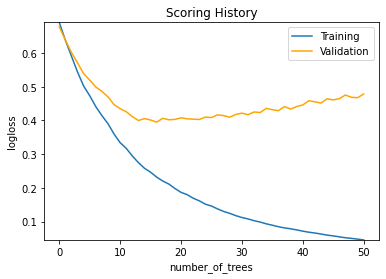

In [53]:
model1.plot(timestep="AUTO", metric="AUTO", server=False)



In [54]:
performance = model1.model_performance()
auc = performance.auc()
false_positive_rate = performance.fprs
true_positive_rate = performance.tprs

In [55]:
performance.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7603988243282046: 


,,0,1,Error,Rate
0,0,55.0,0.0,0.0,(0.0/55.0)
1,1,0.0,48.0,0.0,(0.0/48.0)
2,Total,55.0,48.0,0.0,(0.0/103.0)


In [56]:
performance


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0037846062787108576
RMSE: 0.061519153754833605
LogLoss: 0.045819157861402705
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7603988243282046: 


,,0,1,Error,Rate
0,0,55.0,0.0,0.0,(0.0/55.0)
1,1,0.0,48.0,0.0,(0.0/48.0)
2,Total,55.0,48.0,0.0,(0.0/103.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.760399,1.000000,45.0
1,max f2,0.760399,1.000000,45.0
2,max f0point5,0.760399,1.000000,45.0
3,max accuracy,0.760399,1.000000,45.0
4,max precision,0.993024,1.000000,0.0
5,max recall,0.760399,1.000000,45.0
6,max specificity,0.993024,1.000000,0.0
7,max absolute_mcc,0.760399,1.000000,45.0
8,max min_per_class_accuracy,0.760399,1.000000,45.0
9,max mean_per_class_accuracy,0.760399,1.000000,45.0



Gains/Lift Table: Avg response rate: 46.60 %, avg score: 46.62 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.019417,0.990515,2.145833,2.145833,1.000000,0.991775,1.000000,0.991775,0.041667,0.041667,114.583333,114.583333,0.041667
1,2,0.029126,0.989936,2.145833,2.145833,1.000000,0.989948,1.000000,0.991166,0.020833,0.062500,114.583333,114.583333,0.062500
2,3,0.038835,0.989618,2.145833,2.145833,1.000000,0.989657,1.000000,0.990789,0.020833,0.083333,114.583333,114.583333,0.083333
3,4,0.048544,0.988873,2.145833,2.145833,1.000000,0.989009,1.000000,0.990433,0.020833,0.104167,114.583333,114.583333,0.104167
4,5,0.058252,0.987262,2.145833,2.145833,1.000000,0.987310,1.000000,0.989912,0.020833,0.125000,114.583333,114.583333,0.125000
5,6,0.106796,0.985058,2.145833,2.145833,1.000000,0.986104,1.000000,0.988181,0.104167,0.229167,114.583333,114.583333,0.229167
6,7,0.155340,0.982399,2.145833,2.145833,1.000000,0.983469,1.000000,0.986709,0.104167,0.333333,114.583333,114.583333,0.333333
7,8,0.203883,0.978636,2.145833,2.145833,1.000000,0.979936,1.000000,0.985096,0.104167,0.437500,114.583333,114.583333,0.437500
8,9,0.300971,0.963673,2.145833,2.145833,1.000000,0.972845,1.000000,0.981144,0.208333,0.645833,114.583333,114.583333,0.645833
9,10,0.398058,0.913455,2.145833,2.145833,1.000000,0.937553,1.000000,0.970512,0.208333,0.854167,114.583333,114.583333,0.854167


In [57]:
model1.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7603988243282046: 


,,0,1,Error,Rate
0,0,55.0,0.0,0.0,(0.0/55.0)
1,1,0.0,48.0,0.0,(0.0/48.0)
2,Total,55.0,48.0,0.0,(0.0/103.0)


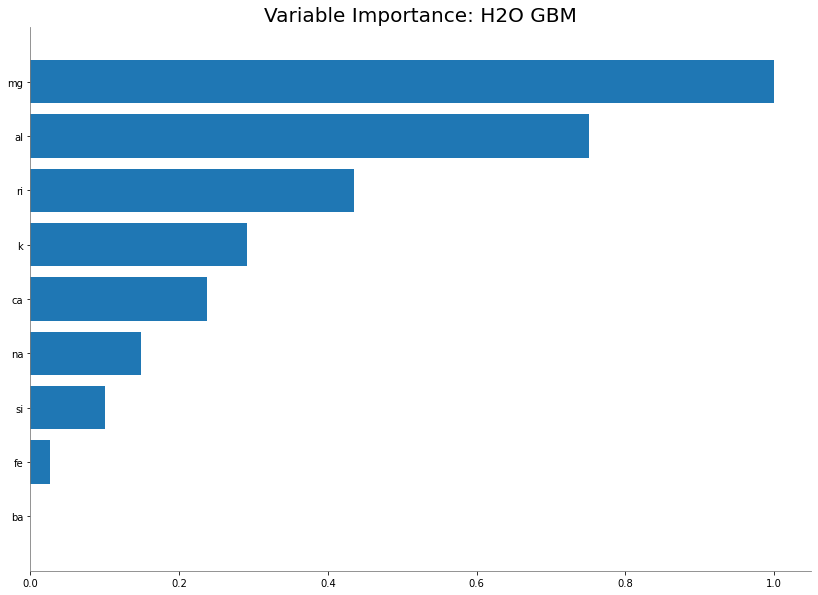

In [58]:
model1.varimp_plot()
# model1.varimp()

In [59]:
model1.rmse()

0.061519153754833605

In [60]:
model1.r2()

0.984791330298923

In [61]:
metrics =  model1.model_performance(valid)
metrics.gini()

0.6705882352941175

In [62]:
model1.gini(train=True, valid=True, xval=False)


{'train': 1.0, 'valid': 0.6705882352941175}

In [63]:
model1.auc(train=True, valid=True, xval=False)

{'train': 1.0, 'valid': 0.8352941176470587}

In [64]:
model1.aucpr(train=True, valid=True, xval=False)

{'train': 1.0, 'valid': 0.8684405076506603}

In [65]:
model1.roc()

([0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.01818181818181818,
  0.03636363636363636,
  0.05454545454545454,
  0.07272727272727272,
  0.09090909090909091,
  0.10909090909090909,
  0.12727272727272726,
  0.14545454545454545,
  0.16363636363636364,
  0.18181818181818182,
  0.2,
  0.21818181818181817,
  0.23636363636363636,
  0.2545454545454545,
  0.2727272727272727,
  0.2909090909090909,
  0.3090909090909091,
  0.32727272727272727,
  0.34545454545454546,
  0.36363636363636365,
  0.38181818181818183,
  0.41818181818181815,
  0.43636363636363634,
  0.45454545454545453,
  0.4727272727272727,
  0.4909090909090909,
  0.509090909090909,
  0.5272727272727272,
  0.5454545454545454,
  0.5636363636363636,
  0.58181818181

In [66]:
model1.F1(train=True, valid=True, xval=False)

{'train': [[0.7603988243282046, 1.0]],
 'valid': [[0.8119100273600736, 0.8421052631578948]]}

In [67]:
model1.accuracy(train=True, valid=True, xval=False)

{'train': [[0.7603988243282046, 1.0]],
 'valid': [[0.9785047660570344, 0.8888888888888888]]}

In [68]:
model1.kolmogorov_smirnov()

0.9272727272727272

In [69]:
performance = model1.model_performance(valid)

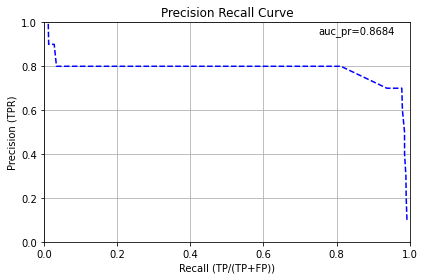

In [70]:
performance.plot("pr")

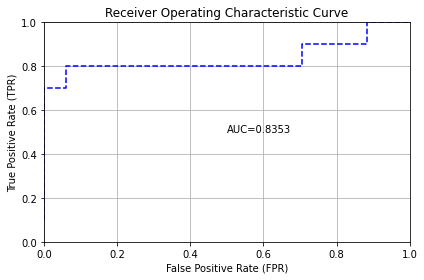

In [71]:
performance.plot(type = "roc")

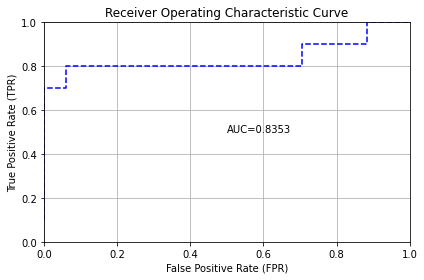

In [72]:
# model1.std_coef_plot() #This function is available for GLM models only
metrics.plot()

In [73]:
p = model1.predict(test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


# Module Testing

In [81]:
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators import H2OGradientBoostingEstimator
from h2o.estimators import H2ODeepLearningEstimator

In [82]:
data = h2o.import_file("./Data/glass.csv")
target = "type"
#mode = PERMISSIVE, DROPMALFORMED, and FAILFAST.

data[target] = data[target].asfactor()

x = data.columns[1:-1]
y = data.columns[-1]

train,valid,test = data.split_frame([.7, .15], seed=42)
x,y


Parse progress: |█████████████████████████████████████████████████████████| 100%


(['ri', 'na', 'mg', 'al', 'si', 'k', 'ca', 'ba', 'fe'], 'type')

In [83]:
# train["type"]
num_f = data.columns_by_type("numeric")
str_f = data.columns_by_type("string")
num_f,str_f

([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0], [])

In [84]:
# auto = H2OAutoML(include_algos=[""])
gbe = H2OGradientBoostingEstimator()

In [85]:
# auto.train(x=x,y=y,training_frame=train,validation_frame=valid)
gbe.train(x=x,y=y,training_frame=train,validation_frame=valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [96]:
gbe.accuracy(train=True, valid=True, xval=True)
gbe.confusion_matrix()
gbe.auc(train=True, valid=True, xval=True)["valid"]

0.6938775510204082

In [102]:
cm = gbe.confusion_matrix(train=True, valid=True, xval=True)["valid"]

In [107]:
gbe.predict(test).prodb

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
0,0.90767,0.0923304
1,0.00807888,0.991921
1,0.394285,0.605715
1,0.0137163,0.986284
1,0.00949103,0.990509
1,0.00617139,0.993829
1,0.0146323,0.985368
1,0.0102889,0.989711
1,0.0618881,0.938112
1,0.0260582,0.973942


#  PySparkling model

In [24]:
import h2o
# frame = h2o.import_file("./Data/glass.csv")
frame = spark.read.csv("./Data/glass.csv", header=True, inferSchema=True)

frame = frame.drop("Index")
# sparkDF = hc.asSparkFrame(frame)
# sparkDF = sparkDF.withColumn("CAPSULE", sparkDF.CAPSULE.cast("string"))

In [7]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
def pm(preds,target):
  preds = preds.withColumn("prediction", preds.prediction.cast("double"))
  preds = preds.withColumn(target, preds.target.cast("double"))
  evaluator = MulticlassClassificationEvaluator(
      labelCol=target, predictionCol="prediction", metricName="accuracy")
  accuracy = evaluator.evaluate(preds)
  evaluator = MulticlassClassificationEvaluator(
      labelCol=target, predictionCol="prediction", metricName="f1")
  f1 = evaluator.evaluate(preds)
  evaluator = MulticlassClassificationEvaluator(
      labelCol=target, predictionCol="prediction", metricName="weightedPrecision")
  weightedPrecision = evaluator.evaluate(preds)

  evaluator = MulticlassClassificationEvaluator(
      labelCol=target, predictionCol="prediction", metricName="weightedRecall")
  weightedRecall = evaluator.evaluate(preds)
  return {"accuracy":accuracy,"f1-score":f1,"precision":weightedPrecision,"recall":weightedRecall}


In [16]:

# PSI NEW CODE
def generateScore(prob):
    """

    :param prob: probability of model on data
    :return: it's return score
    """
    pdo = 20
    odds = prob / (1 - prob)
    factor = pdo / np.log(2)
    offset = 500 - factor * np.log(pdo)
    score = offset + factor * np.log(odds)
    return score


def stabilityHelperPSI_ModelComparison(initial, new):
    """

    :param initial:
    :param new:
    :return:
    """
    size = 11
    mini = np.min(initial["<lambda>(detailed_prediction)"])
    maxi = np.max(new["<lambda>(detailed_prediction)"])
    add = (maxi - mini) / size

    binSupporter = [mini if (i == 0) else (mini := mini + add) for i in range(size)]
    initial_counts = np.histogram(initial, binSupporter)[0]
    new_counts = np.histogram(new, binSupporter)[0]

    df = pd.DataFrame(
        {'Bucket': (np.arange(1, size)), 'Breakpoint Value': binSupporter[1:], 'Train Count': initial_counts,
         'Test Count': new_counts})
    df['Train Percent'] = df['Train Count'] / len(initial)
    df['Test Percent'] = df['Test Count'] / len(new)
    df['Test Percent'][df['Test Percent'] == 0] = 0.001
    df['Train Percent'][df['Train Percent'] == 0] = 0.001

    score = pd.DataFrame()
    score['Score'] = (df['Test Percent'] - df['Train Percent']) * np.log(df['Test Percent'] / df['Train Percent'])
    score.loc[len(score.index)] = np.sum(score['Score'])

    df = pd.concat([df, score], axis=1, sort=False)
    df = df.replace(np.nan, "", regex=True)
    df.replace([np.inf, -np.inf], 0, inplace=True)
    return df.round(2)


def stabilityHelperPSI_OngoingComparison(initial, new):
    """

    :param initial:
    :param new:
    :return:
    """
    size = 11
    mini = np.min(initial["<lambda>(detailed_prediction)"])
    maxi = np.max(new["<lambda>(detailed_prediction)"])
    add = (maxi - mini) / size

    binSupporter = [mini if (i == 0) else (mini := mini + add) for i in range(size)]
    initial_counts = np.histogram(initial, binSupporter)[0]
    new_counts = np.histogram(new, binSupporter)[0]

    df = pd.DataFrame({'Bucket': np.arange(1, size),
                       'Breakpoint Value': binSupporter[1:],
                       'Development Count': initial_counts,
                       'Monitoring Count': new_counts})
    df['Development Percent'] = df['Development Count'] / len(initial)
    df['Monitoring Percent'] = df['Monitoring Count'] / len(new)
    df['Monitoring Percent'][df['Monitoring Percent'] == 0] = 0.001
    df['Development Percent'][df['Development Percent'] == 0] = 0.001

    score = pd.DataFrame()
    score['Score'] = (df['Monitoring Percent'] - df['Development Percent']) * np.log(
        df['Monitoring Percent'] / df['Development Percent'])
    score.loc[len(score.index)] = np.sum(score['Score'])

    df = pd.concat([df, score], axis=1, sort=False)
    df = df.replace(np.nan, "", regex=True)
    df.replace([np.inf, -np.inf], 0, inplace=True)
    return df.round(2)


def PSI_OngoingComparison(developmentProb, monitoringProb):
    """

    :param developmentProb:
    :param monitoringProb:
    :return:
    """
    developmentScore = generateScore(developmentProb)
    monitoringScore = generateScore(monitoringProb)
    psi_table = stabilityHelperPSI_OngoingComparison(developmentScore, monitoringScore)
    return psi_table


def PSI_ModelComparison(developmentProb, monitoringProb):
    """

    :param developmentProb:
    :param monitoringProb:
    :return:
    """
    developmentScore = generateScore(developmentProb)
    monitoringScore = generateScore(monitoringProb)
    psi_table = stabilityHelperPSI_ModelComparison(developmentScore, monitoringScore)
    return psi_table



In [19]:
prob = udf(lambda v: float(v[1][1]), FloatType())
train_prob = train_m.select(prob('detailed_prediction')).toPandas()
test_prob = test_m.select(prob('detailed_prediction')).toPandas()
t = PSI_OngoingComparison(train_prob, test_prob)
t

<ipython-input-16-c17098ba3411>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Monitoring Percent'][df['Monitoring Percent'] == 0] = 0.001
<ipython-input-16-c17098ba3411>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Development Percent'][df['Development Percent'] == 0] = 0.001


,Bucket,Breakpoint Value,Development Count,Monitoring Count,Development Percent,Monitoring Percent,Score
0,1.0,287.748249,13.0,5.0,0.134021,0.102041,0.01
1,2.0,322.257836,21.0,13.0,0.216495,0.265306,0.01
2,3.0,356.767423,18.0,4.0,0.185567,0.081633,0.09
3,4.0,391.277009,0.0,0.0,0.001,0.001,0.00
4,5.0,425.786596,0.0,0.0,0.001,0.001,0.00
5,6.0,460.296183,1.0,1.0,0.010309,0.020408,0.01
6,7.0,494.805769,7.0,2.0,0.072165,0.040816,0.02
7,8.0,529.315356,14.0,6.0,0.14433,0.122449,0.00
8,9.0,563.824943,17.0,12.0,0.175258,0.244898,0.02
9,10.0,598.33453,5.0,3.0,0.051546,0.061224,0.00


In [21]:

# CSI TEST
def stabilityHelper(initial, new):
    """

    :param initial:
    :param new:
    :return:
    """
    size = 11
    mini = np.min(initial)
    maxi = np.max(new)
    add = (maxi - mini) / size

    binSupporter = [mini if (i == 0) else (mini := mini + add) for i in range(size)]
    initial_counts = np.histogram(initial, binSupporter)[0]
    new_counts = np.histogram(new, binSupporter)[0]

    df = pd.DataFrame(
        {'Bucket': np.arange(1, size), 'Breakpoint Value': binSupporter[1:], 'Initial Count': initial_counts,
         'New Count': new_counts})
    df['Initial Percent'] = df['Initial Count'] / len(initial)
    df['New Percent'] = df['New Count'] / len(new)
    df['New Percent'][df['New Percent'] == 0] = 0.001
    df['Initial Percent'][df['Initial Percent'] == 0] = 0.001
    df['score'] = (df['New Percent'] - df['Initial Percent']) * np.log(df['New Percent'] / df['Initial Percent'])
    score = np.sum(df['score'])
    score = np.round(score, 4)
    return score


def calc_csi(column_name, X_train, X_test):
    """

    :param column_name:
    :param X_train:
    :param X_test:
    :return:
    """
    return stabilityHelper(X_train[column_name], X_test[column_name])


def calculate_csi(x_train, x_test):
    """

    :param x_test:
    :param x_train:
    :return:
    """
    features = x_test.columns
    csi_dict = {}
    for feature in features:
        csi_dict[feature] = calc_csi(feature, x_train, x_test)
    table = pd.DataFrame({'Variable': csi_dict.keys(), 'CSI Score': csi_dict.values()})
    return table.round(2)


In [25]:
calculate_csi(frame.toPandas(), frame.toPandas())

<ipython-input-21-dbb7612cf6d5>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['New Percent'][df['New Percent'] == 0] = 0.001
<ipython-input-21-dbb7612cf6d5>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Initial Percent'][df['Initial Percent'] == 0] = 0.001
<ipython-input-21-dbb7612cf6d5>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['New Percent'][df['New Percent'] == 0] = 0.001
<ipython-input-21-dbb7612cf6d5>:24:

,Variable,CSI Score
0,ri,0.0
1,na,0.0
2,mg,0.0
3,al,0.0
4,si,0.0
5,k,0.0
6,ca,0.0
7,ba,0.0
8,fe,0.0
9,type,0.0


In [57]:
import plotly.graph_objects as go

def confusionmatrix_OngoingComparison(cnf_all, cnf_all2):
    """
    :param cnf_all:
    :param cnf_all2:
    :return:
    """
    x = ['Positive', 'Negative']
    y = ['Positive', 'Negative']

    fig = go.Figure()
    for step in range(9):
        fig.add_trace(go.Heatmap(visible=False, x=x, y=y, z=cnf_all[step], colorscale="teal"))
    fig.data[4].visible = True

    anno = []
    for i, row in enumerate(cnf_all[4]):
        for j, value in enumerate(row):
            anno.append(
                {
                    "x": x[j],
                    "y": y[i],
                    "font": {"color": "white", "size": 16},
                    "text": str(value),
                    "xref": "x1",
                    "yref": "y1",
                    "showarrow": False
                }
            )

    # Create and add slider
    steps = []
    for i in range(len(fig.data)):
        step = dict(method="update", args=[{"visible": [False] * len(fig.data)},
                                           {"title": "Slider switched to Threshold: " + str((i + 1) / 10)}],
                    label="Threshold : " + str((i + 1) / 10),  # layout attribute
                    )
        step["args"][0]["visible"][i] = True  # Toggle trace to "visible"
        steps.append(step)
    fig.update_layout(title_text=f"Monitoring Confusion Matrix", title_x=0.5, annotations=anno)

    fig2 = go.Figure()
    for step in range(9):
        fig2.add_trace(go.Heatmap(visible=False, x=x, y=y, z=cnf_all2[step], colorscale="teal"))
    fig2.data[4].visible = True

    anno2 = []
    for i, row in enumerate(cnf_all2[4]):
        for j, value2 in enumerate(row):
            anno2.append(
                {
                    "x": x[j],
                    "y": y[i],
                    "font": {"color": "white", "size": 16},
                    "text": str(value2),
                    "xref": "x1",
                    "yref": "y1",
                    "showarrow": False
                }
            )
    # Create and add slider
    steps = []
    for i in range(len(fig2.data)):
        step = dict(
            method="update",
            args=[{"visible": [False] * len(fig2.data)},
                  {"title": "Slider switched to Threshold: " + str((i + 1) / 10)}],
            label="Threshold : " + str((i + 1) / 10),  # layout attribute
        )
        step["args"][0]["visible"][i] = True  # Toggle trace to "visible"
        steps.append(step)
    fig2.update_layout(title_text=f"Development Confusion Matrix", title_x=0.5, annotations=anno2)
    return fig, fig2


def CM_OngoingComparison(train_model, test_model, target_column):
    """

    :param train_model:
    :param test_model:
    :param target_column:
    :return:
    """
    train_pred_actual = train_model.select(col("prediction").cast('float'), col(target_column).cast('float'))
    test_pred_actual = test_model.select(col("prediction").cast('float'), col(target_column).cast('float'))
    train_metrics = MulticlassMetrics(train_pred_actual.rdd.map(tuple))
    test_metrics = MulticlassMetrics(test_pred_actual.rdd.map(tuple))
    figs = confusionmatrix_OngoingComparison(train_metrics.confusionMatrix().toArray(),
                                             test_metrics.confusionMatrix().toArray())
    return figs


def confusionmatrix_ModelComparison(cnf_all):
    """

    :param cnf_all:
    :return:
    """
    x = ['Positive', 'Negative']
    y = ['Positive', 'Negative']

    fig = go.Figure()
    for step in range(9):
        fig.add_trace(go.Heatmap(visible=False, x=x, y=y, z=cnf_all[step], colorscale="teal"))
#     fig.data[4].visible = True

    anno2 = []
    for i, row in enumerate(cnf_all[4]):
        for j, value2 in enumerate(row):
            anno2.append(
                {
                    "x": x[j],
                    "y": y[i],
                    "font": {"color": "white", "size": 16},
                    "text": str(value2),
                    "xref": "x1",
                    "yref": "y1",
                    "showarrow": False
                }
            )

    # Create and add slider
    steps = []
    for i in range(len(fig.data)):
        step = dict(
            method="update",
            args=[{"visible": [False] * len(fig.data)},
                  {"title": "Slider switched to Threshold: " + str((i + 1) / 10)}],
            label="Threshold : " + str((i + 1) / 10),  # layout attribute
        )
        step["args"][0]["visible"][i] = True  # Toggle trace to "visible"
        steps.append(step)
    fig.update_layout(title_text=f"<b>CONFUSION MATRIX<b>", title_x=0.5, annotations=anno2)
    return fig


def CM_ModelComparison(model, target_column):
    """

    :param model: this contain actual label and model predicted label
    :param target_column:
    :return:
    """
    pred_actual = model.select(col("prediction").cast('float'), col(target_column).cast('float'))
    metrics = MulticlassMetrics(pred_actual.rdd.map(tuple))
#     fig = metrics.confusionMatrix().toArray()
    fig = confusionmatrix_ModelComparison(metrics.confusionMatrix().toArray())
    return fig


In [323]:
tar = 'type'
CM_ModelComparison(train_m, tar)
train_m.select("type").show()

array([[57.,  0.],
       [ 0., 45.]])

In [346]:
pred_actual = train_m.select(col("prediction").cast('float'), col(tar).cast('float')).rdd.map(tuple)


[(1.0, 1.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 1.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 1.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 1.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 1.0),
 (0.0, 0.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (0.0, 0.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 1.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 1.0),
 (0.0, 0.0),
 (1.0, 1.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 1.0),

In [349]:
pred_actual = train_m.select(col("prediction").cast('float'), col(tar).cast('float')).rdd.map(tuple)
metrics = BinaryClassificationMetrics(pred_actual)
metrics.areaUnderROC

1.0

In [10]:
def get_data():
    data = spark.read.csv("./Data/glass.csv",header=True,inferSchema=True)
    
    #Feture col name
    data = data.drop("Index")
    col = data.columns[:-1]
    
    #Group feature
    feature_assembler = VectorAssembler(inputCols=col,outputCol="features")
    data = feature_assembler.transform(data)
    #dataset contain only feature and class label
    data = data.select(["features", "type"])
    train,test = data.randomSplit([.7,.3])
    return train,test
    

In [5]:
col = frame.columns[:-1]
col

NameError: name 'frame' is not defined

In [77]:
frame = VectorAssembler(inputCols=col, outputCol="feature").transform(frame).select(["feature","type"])

In [181]:
train,test= frame.randomSplit([0.7, 0.3])

In [182]:
train.show()

+--------------------+----+
|             feature|type|
+--------------------+----+
|[1.51215,12.99,3....|   1|
|[1.51567,13.29,3....|   1|
|[1.51569,13.24,3....|   0|
|[1.51588,13.12,3....|   0|
|[1.51589,12.88,3....|   1|
|[1.5159,12.82,3.5...|   0|
|[1.5159,13.02,3.5...|   0|
|[1.5159,13.24,3.3...|   0|
|[1.51593,13.09,3....|   0|
|[1.51593,13.25,3....|   0|
|[1.51605,12.9,3.4...|   0|
|[1.51618,13.01,3....|   0|
|[1.51625,13.36,3....|   0|
|[1.51627,13.0,3.5...|   0|
|[1.51629,12.71,3....|   0|
|[1.51631,13.34,3....|   0|
|[1.5164,12.55,3.4...|   0|
|[1.51645,13.4,3.4...|   0|
|[1.51645,13.44,3....|   0|
|[1.51646,13.41,3....|   0|
+--------------------+----+
only showing top 20 rows



In [4]:
from pysparkling.ml import H2ODeepLearningClassifier,H2ODRFClassifier, H2OGLMClassifier, H2OXGBoostClassifier
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.mllib.evaluation import MulticlassMetrics, BinaryClassificationMetrics  # MM for cm and BM for roc,auc
from pyspark.ml.evaluation import MulticlassClassificationEvaluator  # P,R,F-1,TPR,FPR
from pyspark.sql.functions import col, udf, lit
from pyspark.sql.types import FloatType
import h2o
from pysparkling.ml import *


In [5]:
data = spark.read.csv("./Data/glass.csv",header=True,inferSchema=True)

#Feture col name
data = data.drop("Index")
col = data.columns[:-1]

# #Group feature
feature_assembler = VectorAssembler(inputCols=col,outputCol="features")
data = feature_assembler.transform(data)

In [6]:
# data = h2o.import_file("./Data/glass.csv")
# target = "type"
# #mode = PERMISSIVE, DROPMALFORMED, and FAILFAST.

# data[target] = data[target].asfactor()


In [19]:
estimator = H2OXGBoostClassifier(labelCol = "type",featuresCols=["features"], nfolds=5,withContributions=True)

In [8]:
estimator = estimator.fit(data)

In [11]:
train,test = get_data()
# train.show()

In [12]:
train_m = estimator.transform(train)
test_m = estimator.transform(test)

In [13]:
train_m.show()

+--------------------+----+--------------------+----------+
|            features|type| detailed_prediction|prediction|
+--------------------+----+--------------------+----------+
|[1.51215,12.99,3....|   1|[1, [0.0738757848...|         1|
|[1.51409,14.25,3....|   0|[0, [0.9860954880...|         0|
|[1.51567,13.29,3....|   1|[1, [0.0647733807...|         1|
|[1.51571,12.72,3....|   1|[1, [0.2455348968...|         1|
|[1.51589,12.88,3....|   1|[1, [0.0853623151...|         1|
|[1.5159,13.02,3.5...|   0|[0, [0.9708417654...|         0|
|[1.51593,13.09,3....|   0|[0, [0.9369503259...|         0|
|[1.51593,13.25,3....|   0|[0, [0.9739292263...|         0|
|[1.51596,13.02,3....|   0|[0, [0.9395032525...|         0|
|[1.51605,12.9,3.4...|   0|[0, [0.9351629018...|         0|
|[1.51618,13.01,3....|   0|[0, [0.9865081310...|         0|
|[1.51618,13.53,3....|   1|[1, [0.3061163425...|         1|
|[1.51627,13.0,3.5...|   0|[0, [0.9942942857...|         0|
|[1.51631,13.34,3....|   0|[0, [0.992401

In [14]:
temp = train_m.select("detailed_prediction.contributions").toPandas()
temp

,contributions
0,"(-0.045132867991924286, -0.2591251730918884, 1..."
1,"(-0.3182479441165924, -0.08733926713466644, -0..."
2,"(-1.0013213157653809, 0.07252603769302368, 1.4..."
3,"(0.045811064541339874, 0.928291380405426, 0.98..."
4,"(-0.007211464922875166, 0.11474157869815826, 0..."
...,...
92,"(-0.2879519462585449, -0.0001032613217830658, ..."
93,"(0.3166464567184448, 0.20421679317951202, 0.52..."
94,"(-0.11344064772129059, 0.13530553877353668, -2..."
95,"(-0.2879519462585449, -0.0001032613217830658, ..."


In [15]:
train_m.printSchema()

root
 |-- features: vector (nullable = true)
 |-- type: integer (nullable = true)
 |-- detailed_prediction: struct (nullable = true)
 |    |-- label: string (nullable = true)
 |    |-- probabilities: struct (nullable = false)
 |    |    |-- 0: double (nullable = false)
 |    |    |-- 1: double (nullable = false)
 |    |-- contributions: struct (nullable = false)
 |    |    |-- features.0: float (nullable = false)
 |    |    |-- features.1: float (nullable = false)
 |    |    |-- features.2: float (nullable = false)
 |    |    |-- features.3: float (nullable = false)
 |    |    |-- features.4: float (nullable = false)
 |    |    |-- features.5: float (nullable = false)
 |    |    |-- features.6: float (nullable = false)
 |    |    |-- features.7: float (nullable = false)
 |    |    |-- features.8: float (nullable = false)
 |    |    |-- BiasTerm: float (nullable = false)
 |-- prediction: string (nullable = true)



In [16]:

def feat_imp(model, title, data,  target, depth):
    features = data.drop(target)
    data = VectorAssembler(inputCols=features.columns, outputCol="feature").transform(data)
    model = model.fit(data)
    model = model.transform(data)
    temp = model.select("detailed_prediction.contributions").toPandas().iloc[0]
    temp = temp[0].asDict()
    fi = pd.DataFrame(temp.values(), columns=["values"])
    fi["nor_value"] = fi.values/np.sum(fi.values)
    features_col = pd.Series(temp.keys())
    fi["features"] = features_col
    fi = fi.sort_values(by=['values'], ascending=False).round(2)
    fi = fi.iloc[:depth]
    trace = go.Bar(x=fi["features"], y=fi["nor_value"], marker=dict(color='#32E0C4'))
    data = [trace]
    layout = go.Layout()
    fig = go.Figure(data=data, layout=layout)
    fig.update_layout({'plot_bgcolor': 'rgba(0,0,0,0)', 'paper_bgcolor': 'rgba(0,0,0,0)'})
    fig.update_layout(title_text=f"<b>{title}<b> ", title_x=0.5)
    fig.update_xaxes(title_text='Features')
    fig.update_yaxes(title_text='Feature Importance')
    fig.update_xaxes(showline=True, linewidth=1, linecolor='black', rangemode='nonnegative')
    fig.update_yaxes(showline=True, linewidth=1, linecolor='black', rangemode='nonnegative')
    return fi, fig

In [17]:
import plotly as py
import plotly.tools as tls
import plotly.offline as pyo
import plotly.graph_objs as go


In [20]:
fi,fig = feat_imp(estimator, "name", data,  "type", 5)

In [21]:
fi

,values,nor_value,features
5,1.29,0.38,features.5
6,1.07,0.32,features.6
3,0.91,0.27,features.3
1,0.34,0.10,features.1
0,0.30,0.09,features.0


In [22]:
pyo.plot(fig)

'temp-plot.html'

In [201]:
# model.save("XGBoost")
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator

In [74]:
class CurveMetrics(BinaryClassificationMetrics):
    def __init__(self, *args):
        super(CurveMetrics, self).__init__(*args)

    def _to_list(self, rdd):
        points = []
        # Note this collect could be inefficient for large datasets
        # considering there may be one probability per datapoint (at most)
        # The Scala version takes a numBins parameter,
        # but it doesn't seem possible to pass this from Python to Java
        for row in rdd.collect():
            # Results are returned as type scala.Tuple2,
            # which doesn't appear to have a py4j mapping
            points += [(float(row._1()), float(row._2()))]
        return points

    def get_curve(self, method):
        rdd = getattr(self._java_model, method)().toJavaRDD()
        return self._to_list(rdd)



In [71]:
def get_model(train_data, model_key, n_fold):
    model = None
    if model_key == 1:
        model = H2ODRFClassifier(labelCol='label', featuresCols=["features"], nfolds=n_fold)
        model = model.fit(train_data)
    elif model_key == 2:
        model = H2OGLMClassifier(labelCol='label', featuresCols=["features"], nfolds=n_fold)
        model = model.fit(train_data)
    elif model_key == 3:
        model = H2OXGBoostClassifier(labelCol='label', featuresCols=["features"],nfolds=n_fold)
        model = model.fit(train_data)
    elif model_key == 4:
        model = H2ODeepLearningClassifier(labelCol='label', featuresCols=["features"], nfolds=n_fold)
        model = model.fit(train_data)
    return model


def main_kfold(data, names, metrics, target, n_fold):
    # helper = Model_helper(username=user)
    # colors = helper.preference_maker(6)
    data = data.withColumnRenamed(target, "label")
    models = []
    for i in names:
        key = None
        if i.lower() == 'H2ODRFClassifier'.lower():
            key = 1
        elif i.lower() == 'H2OGLMClassifier'.lower():
            key = 2
        elif i.lower() == 'H2OXGBoostClassifier'.lower():
            key = 3
        elif i.lower() == 'H2ODeepLearningClassifier'.lower():
            key = 4

        t = get_model(data, key, n_fold)
        models.append(t)


    mean_acc = []
    mean_f1 = []
    mean_roc = []
    mean_prec = []
    mean_rec = []
    figures = []
    qw = 0
#     col = colors
#     col.append(['purple', 'violet', 'black', 'pink'])
    for model in models:
        m_name = names[qw]
        model = model.transform(data)
        Pred_Actual = model.select(col("prediction").cast('double'), col("label").cast('double'))
        if 'accuracy' in metrics:
            evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",
                                                          metricName="accuracy")
            accuracy = evaluator.evaluate(Pred_Actual)
            mean_acc.append(round(accuracy, 2))
        if 'f1' in metrics:
            evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
            f1 = evaluator.evaluate(Pred_Actual)
            mean_f1.append(round(f1, 2))
        if 'roc' in metrics:
            evaluator = BinaryClassificationEvaluator(rawPredictionCol = "prediction")
            roc = evaluator.evaluate(Pred_Actual)
            mean_roc.append(round(roc, 2))
        if 'precision' in metrics:
            evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="weightedPrecision")
            weightedPrecision = evaluator.evaluate(Pred_Actual)
            mean_prec.append(round(weightedPrecision, 2)) 
        if 'recall' in metrics:
            evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="weightedRecall")
            weightedRecall = evaluator.evaluate(Pred_Actual)
            mean_rec.append(round(weightedRecall, 2))

        # Compute ROC curve and area the curve
        BCM = model.select("label", 'detailed_prediction').rdd.map(lambda row: (float(row['detailed_prediction'][1][1]), float(row['label'])))
        curveMetrics = CurveMetrics(BCM)
        roc_auc = curveMetrics.areaUnderROC
        points = curveMetrics.get_curve('roc')
        fpr = np.array([x[0] for x in points])
        tpr = np.array([x[1] for x in points])
        roc_auc = ' AUC Score= ' + str(round(roc_auc, 2))
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1],
                                 mode='lines',
                                 name='No Skill',
                                 line=dict(color='black', width=0.5, dash='dash')))
        fig.add_trace(go.Scatter(x=fpr, y=tpr,
                                 mode='lines',
                                 name=roc_auc,
                                 line=dict(color="purple", width=1)))
        tit = 'ROC Curve for ' + m_name
        # fig.update_layout(yaxis_title="<b> True Positive Rate </b>", xaxis_title="<b> False Positive Rate </b>")
        fig.update_layout({'plot_bgcolor': 'rgba(0,0,0,0)', 'paper_bgcolor': 'rgba(0,0,0,0)'})
        fig.update_xaxes(title_text='False Positive Rate', showline=True, linewidth=1, linecolor='black',
                         rangemode='nonnegative')
        fig.update_yaxes(title_text='True Positive Rate', showline=True, linewidth=1, linecolor='black',
                         rangemode='nonnegative')
        fig.update_layout(title={'text': tit,
                                 'y': 0.9,
                                 'x': 0.5,
                                 'xanchor': 'center',
                                 'yanchor': 'top'})
    
        figures.append(fig)
        qw = qw + 1
#     figure = tuple(figures)
    
    
    table = pd.DataFrame()
    table['Model Name'] = names
    if 'accuracy' in metrics:
        table['Mean Accuracy Score'] = mean_acc
    if 'f1' in metrics:
        table['Mean f1 Score'] = mean_f1
    if 'roc' in metrics:
        table['Mean AUCROC Score'] = mean_roc
    if 'precision' in metrics:
        table['Mean Precision Score'] = mean_prec
    if 'recall' in metrics:
        table['Mean Recall Score'] = mean_rec

    return table, figures


In [72]:
metrics = ["accuracy",'f1','roc','precision','recall']

In [89]:
tab,fig = main_kfold(train,["H2ODeepLearningClassifier","H2OXGBoostClassifier","H2OGLMClassifier","H2ODRFClassifier"],metrics,"type",5)

In [38]:
import numpy as np
import pandas as pd
import plotly as py
import plotly.tools as tls
import plotly.offline as pyo
import plotly.graph_objs as go

In [97]:
pyo.plot(fig[3])

'temp-plot.html'

In [98]:
tab

,Model Name,Mean Accuracy Score,Mean f1 Score,Mean AUCROC Score,Mean Precision Score,Mean Recall Score
0,H2ODeepLearningClassifier,0.84,0.83,0.83,0.84,0.84
1,H2OXGBoostClassifier,1.00,1.00,1.00,1.00,1.00
2,H2OGLMClassifier,0.84,0.84,0.84,0.84,0.84
3,H2ODRFClassifier,1.00,1.00,1.00,1.00,1.00


In [104]:
col = ["s"]
col.extend(['purple', 'violet', 'black', 'pink'])

In [105]:
col

['s', 'purple', 'violet', 'black', 'pink']

In [326]:
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

In [327]:
prediction = model.transform(train)#.show(truncate = False)
prob_only=udf(lambda v : float(v[1][1]), FloatType())
train_prob = prediction.select(prob_only('detailed_prediction'))

In [328]:
prediction = model.transform(test)#.show(truncate = False)
prob_only=udf(lambda v : float(v[1][1]), FloatType())
test_prob = prediction.select(prob_only('detailed_prediction'))

In [329]:
PSI_ModelComparison(train_prob.toPandas(),test_prob.toPandas())

<ipython-input-206-c17098ba3411>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-206-c17098ba3411>:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Bucket,Breakpoint Value,Train Count,Test Count,Train Percent,Test Percent,Score
0,1.0,269.301419,7.0,2.0,0.068627,0.045455,0.01
1,2.0,300.990931,18.0,0.0,0.176471,0.001,0.91
2,3.0,332.680442,19.0,4.0,0.186275,0.090909,0.07
3,4.0,364.369954,11.0,11.0,0.107843,0.25,0.12
4,5.0,396.059465,2.0,4.0,0.019608,0.090909,0.11
5,6.0,427.748976,0.0,2.0,0.001,0.045455,0.17
6,7.0,459.438488,2.0,1.0,0.019608,0.022727,0.00
7,8.0,491.127999,9.0,9.0,0.088235,0.204545,0.10
8,9.0,522.81751,15.0,4.0,0.147059,0.090909,0.03
9,10.0,554.507022,11.0,5.0,0.107843,0.113636,0.00


In [331]:
data = spark.read.csv("./Data/glass.csv",header=True,inferSchema=True)
data = data.drop("Index")
col = data.columns[:-1]
train,test = data.randomSplit([.7,.3])

calculate_csi(train.toPandas(), test.toPandas())

<ipython-input-210-dbb7612cf6d5>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-210-dbb7612cf6d5>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-210-dbb7612cf6d5>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-210-dbb7612cf6d5>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

,Variable,CSI Score
0,ri,0.22
1,na,0.28
2,mg,0.12
3,al,0.62
4,si,0.48
5,k,0.32
6,ca,0.42
7,ba,0.02
8,fe,0.20
9,type,0.00


In [36]:

def KS_ModelComparison(dataset_model, target_column):
    """

    :param dataset_model:
    :param target_column:
    :param user:
    :return:
    """
#     helper = Model_helper(username=user)
#     colors = helper.preference_maker(2)
    prob = udf(lambda v: float(v[1][1]), FloatType())
    y_probas = dataset_model.select(prob('detailed_prediction')).toPandas().values    
    y_true = dataset_model.select(target_column).toPandas().values
    thresholds, pct1, pct2, ks_statistic, max_distance_at, classes = binary_ks_curve(np.array(y_true).reshape(-1),
                                                                                     np.array(y_probas).reshape(-1))

    fig = go.Figure()
    idx = np.where(thresholds == max_distance_at)[0][0]
    fig.add_shape(dict(type="line", x0=max_distance_at, y0=pct1[idx], x1=max_distance_at, y1=pct2[idx],
                       line=dict(color="rgba(0,0,0,0)", width=3, dash="dot")))
    fig.add_trace(go.Scatter(x=thresholds, y=pct2, mode='lines', name='Class 1', line=dict(color="rgba(0,255,0,0)")))
    fig.add_trace(go.Scatter(x=thresholds, y=pct1, mode='lines', name='Class 0', line=dict(color="rgba(0,0,0,255)")))
    fig.add_annotation(x=1, y=0.05, showarrow=False,
                       text='KS Statistic : {:.3f} at {:.3f}'.format(ks_statistic, max_distance_at))
    fig.update_layout(title_text=f"<b>KS STATISTICS<b>", title_x=0.5)
    fig.update_layout({'plot_bgcolor': 'rgba(0,0,0,0)', 'paper_bgcolor': 'rgba(0,0,0,0)'})
    fig.update_xaxes(title_text='Threshold')
    fig.update_yaxes(title_text='Percentage Below Threshold')
    fig.update_xaxes(showline=True, linewidth=1, linecolor='black', rangemode='nonnegative')
    fig.update_yaxes(showline=True, linewidth=1, linecolor='black', rangemode='nonnegative')
    fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=-0.23, xanchor="right", x=0.6))
    return fig


In [39]:
from scikitplot.helpers import binary_ks_curve

print(KS_ModelComparison(train_m, "type"))

Figure({
    'data': [{'line': {'color': 'rgba(0,255,0,0)'},
              'mode': 'lines',
              'name': 'Class 1',
              'type': 'scatter',
              'x': array([0.        , 0.00384793, 0.0057057 , 0.00573275, 0.00581001, 0.00633787,
                          0.00661947, 0.00683081, 0.0071539 , 0.008824  , 0.00938636, 0.01046497,
                          0.01176845, 0.01224577, 0.01349188, 0.0139045 , 0.01417473, 0.01464176,
                          0.0154117 , 0.01679967, 0.01822861, 0.0206045 , 0.02085172, 0.02117021,
                          0.02121757, 0.02495861, 0.02607077, 0.02766079, 0.02815778, 0.03133982,
                          0.03242975, 0.03273669, 0.03331622, 0.03416194, 0.0351303 , 0.0407465 ,
                          0.04678419, 0.04779389, 0.04803922, 0.05363332, 0.05376086, 0.05706179,
                          0.06049675, 0.06165049, 0.06304969, 0.06332016, 0.06483711, 0.07452318,
                          0.07680024, 0.1003314 , 0.104102

In [53]:

def KS_OngoingComparison(train_model, test_model, target_column, user):
    """

    :param train_model:
    :param test_model:
    :param target_column:
    :param user:
    :return:
    """
    # train data
#     helper = Model_helper(username=user)
#     colors = helper.preference_maker(2)
    prob = udf(lambda v: float(v[1][1]), FloatType())
    y_probas = train_model.select(prob('detailed_prediction')).toPandas().values
    y_true = train_model.select(target_column).toPandas().values
    thresholds, pct1, pct2, ks_statistic, max_distance_at, classes = binary_ks_curve(np.array(y_true).reshape(-1),
                                                                                     np.array(y_probas).reshape(-1))

    fig = go.Figure()
    idx = np.where(thresholds == max_distance_at)[0][0]
    fig.add_shape(dict(type="line", x0=max_distance_at, y0=pct1[idx], x1=max_distance_at, y1=pct2[idx],
                       line=dict(color="rgba(0,0,0,0)", width=3, dash="dot")))
    fig.add_trace(go.Scatter(x=thresholds, y=pct2, mode='lines', name='Class 1', line=dict(color="rgba(0,255,0,0)")))
    fig.add_trace(go.Scatter(x=thresholds, y=pct1, mode='lines', name='Class 0', line=dict(color="rgba(0,255,0,0)")))
    fig.add_annotation(x=1, y=0.05, showarrow=False,
                       text='KS Statistic : {:.3f} at {:.3f}'.format(ks_statistic, max_distance_at))
    fig.update_layout(title_text=f"Monitoring KS Statistic", title_x=0.5)
    fig.update_layout({'plot_bgcolor': 'rgba(0,0,0,0)', 'paper_bgcolor': 'rgba(0,0,0,0)'})
    fig.update_xaxes(title_text='Threshold')
    fig.update_yaxes(title_text='Percentage Below Threshold')
    fig.update_xaxes(showline=True, linewidth=1, linecolor='black', rangemode='nonnegative')
    fig.update_yaxes(showline=True, linewidth=1, linecolor='black', rangemode='nonnegative')
    fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=-0.23, xanchor="right", x=0.6))

    # test data
    prob = udf(lambda v: float(v[1][1]), FloatType())
    y_probas = test_model.select(prob('detailed_prediction')).toPandas().values
    y_true = test_model.select(target_column).toPandas().values
    thresholds, pct1, pct2, ks_statistic, max_distance_at, classes = binary_ks_curve(np.array(y_true).reshape(-1),
                                                                                     np.array(y_probas).reshape(-1))

    fig2 = go.Figure()
    idx = np.where(thresholds == max_distance_at)[0][0]
    fig2.add_shape(dict(type="line", x0=max_distance_at, y0=pct1[idx], x1=max_distance_at, y1=pct2[idx],
                        line=dict(color="rgba(0,0,0,0)", width=3, dash="dot")))
    fig2.add_trace(go.Scatter(x=thresholds, y=pct2, mode='lines', name='Class 1', line=dict(color="rgba(0,255,0,0)")))
    fig2.add_trace(go.Scatter(x=thresholds, y=pct1, mode='lines', name='Class 0', line=dict(color="rgba(0,255,0,0)")))
    fig2.add_annotation(x=1, y=0.05, showarrow=False,
                        text='KS Statistic : {:.3f} at {:.3f}'.format(ks_statistic, max_distance_at))
    fig2.update_layout(title_text=f"Development KS Statistic", title_x=0.5)
    fig2.update_layout({'plot_bgcolor': 'rgba(0,0,0,0)', 'paper_bgcolor': 'rgba(0,0,0,0)'})
    fig2.update_xaxes(title_text='Threshold')
    fig2.update_yaxes(title_text='Percentage Below Threshold')
    fig2.update_xaxes(showline=True, linewidth=1, linecolor='black', rangemode='nonnegative')
    fig2.update_yaxes(showline=True, linewidth=1, linecolor='black', rangemode='nonnegative')
    fig2.update_layout(legend=dict(orientation="h", yanchor="bottom", y=-0.23, xanchor="right", x=0.6))
    return fig, fig2



In [54]:
target_column = "type"

In [55]:
 KS_OngoingComparison(train_m, test_m, target_column, "user")

(Figure({
     'data': [{'line': {'color': 'rgba(0,255,0,0)'},
               'mode': 'lines',
               'name': 'Class 1',
               'type': 'scatter',
               'x': array([0.        , 0.00384793, 0.0057057 , 0.00573275, 0.00581001, 0.00633787,
                           0.00661947, 0.00683081, 0.0071539 , 0.008824  , 0.00938636, 0.01046497,
                           0.01176845, 0.01224577, 0.01349188, 0.0139045 , 0.01417473, 0.01464176,
                           0.0154117 , 0.01679967, 0.01822861, 0.0206045 , 0.02085172, 0.02117021,
                           0.02121757, 0.02495861, 0.02607077, 0.02766079, 0.02815778, 0.03133982,
                           0.03242975, 0.03273669, 0.03331622, 0.03416194, 0.0351303 , 0.0407465 ,
                           0.04678419, 0.04779389, 0.04803922, 0.05363332, 0.05376086, 0.05706179,
                           0.06049675, 0.06165049, 0.06304969, 0.06332016, 0.06483711, 0.07452318,
                           0.07680024, 0.1003

In [362]:

def calc_vif_ModelComparison(X):
    """

    :param X:
    :return:
    """
    vif = {"Variable": X.columns.tolist(), "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]}
    vif = pd.DataFrame(vif).round(2)
    return vif



In [365]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
print(calc_vif_ModelComparison(data.toPandas()))


  Variable         VIF
0       ri  1180436.30
1       na    22627.01
2       mg     1652.00
3       al      261.68
4       si   589835.68
5        k       56.61
6       ca    13320.16
7       ba       12.17
8       fe        1.71
9     type        2.76


In [366]:

# HL test
def make_recarray(model, target):
    """

    :param model:
    :param target:
    :return:
    """
    y_true = model.select([target]).toPandas()
    y_pred = model.select(["prediction"]).toPandas()
    recarrays = np.recarray((len(y_true), 1), [('y_true', 'u8'), ('y_pred', 'f8')])
    recarrays['y_true'] = y_true
    recarrays['y_pred'] = y_pred
    recarrays.sort(order='y_pred')
    return recarrays


def hosmer_lemeshow_table(model, target, n_groups=10):
    """

    :param model:
    :param target:
    :param n_groups:
    :return:
    """
    if n_groups < 2:
        raise ValueError('Number of groups must be greater than or equal to 2')
    elif n_groups > model.select(["prediction"]).count():
        raise ValueError('Number of predictions must exceed number of groups')
    table = make_recarray(model, target)
    table = [(len(g), g.y_true.sum(), g.y_pred.sum(), g.y_pred.mean()) for g in np.array_split(table, n_groups)]
    names = ('group_size', 'obs_freq', 'pred_freq', 'mean_prob')
    table = np.rec.fromrecords(table, names=names)
    return table


def hlTest(model_name, target, model):
    """

    :param model_name:
    :param target:
    :param model:
    :return:
    """

    table = hosmer_lemeshow_table(model, target)
    num = np.square(table.obs_freq - table.mean_prob)
    den = table.group_size * table.mean_prob * (1 - table.mean_prob)
    C_hat = np.sum(num / den)
    df = len(table) - 2
    p = chi2.sf(C_hat, df)

    if p > 0.05:
        conclusion = 'The Model is adequate'
    else:
        conclusion = 'The Model is not adequate'

    table = {'Groups': 10, 'HL test Statistic': C_hat, 'DOF': df, 'P-Value': p, 'Conclusion': conclusion}
    table = pd.DataFrame(table, index=[model_name])
    table = table.round(2)
    return table

In [368]:
from scipy.stats.distributions import chi2

print(hlTest("XGBoost", tar, train_m))

<ipython-input-366-94bb687fc24b>:49: RuntimeWarning:

divide by zero encountered in true_divide

<ipython-input-366-94bb687fc24b>:49: RuntimeWarning:

invalid value encountered in true_divide



         Groups  HL test Statistic  DOF  P-Value                 Conclusion
XGBoost      10                NaN    8      NaN  The Model is not adequate


In [369]:

def feature_importance_graph_ModelComparison(target_column, data):
    """

    :param target_column:
    :param data:
    :return:
    """
    features = data.drop(target_column)
    data = VectorAssembler(inputCols=features.columns, outputCol="feature").transform(data)
    rf_model = RandomForestClassifier(labelCol=target_column, featuresCol="feature", numTrees=10)
    rf_model = rf_model.fit(data)
    fi = pd.DataFrame({"Features": features.columns, "Importance": [i for i in rf_model.featureImportances.values]})
    x, y = (list(x) for x in zip(*sorted(zip(rf_model.featureImportances.values, features.columns), reverse=True)))
    trace = go.Bar(x=y, y=x, marker=dict(color='#32E0C4'))
    data = [trace]
    layout = go.Layout()
    fig = go.Figure(data=data, layout=layout)
    fig.update_layout({'plot_bgcolor': 'rgba(0,0,0,0)', 'paper_bgcolor': 'rgba(0,0,0,0)'})
    fig.update_layout(title_text="<b>RANDOM FOREST BASED FEATURE IMPORTANCE<b> ", title_x=0.5)
    fig.update_xaxes(title_text='Features')
    fig.update_yaxes(title_text='Feature Importance')
    fig.update_xaxes(showline=True, linewidth=1, linecolor='black', rangemode='nonnegative')
    fig.update_yaxes(showline=True, linewidth=1, linecolor='black', rangemode='nonnegative')
    return fi.round(2), fig


In [370]:
print(feature_importance_graph_ModelComparison(tar,data))

(  Features  Importance
0       ri        0.26
1       na        0.04
2       mg        0.16
3       al        0.21
4       si        0.08
5        k        0.02
6       ca        0.13
7       ba        0.00
8       fe        0.09, Figure({
    'data': [{'marker': {'color': '#32E0C4'},
              'type': 'bar',
              'x': [ri, al, mg, ca, fe, si, na, k, ba],
              'y': [0.26102262922077185, 0.206791100337647, 0.16018605079705983,
                    0.13262792575824972, 0.09427101268269311, 0.0811018040726525,
                    0.03594012951642488, 0.023520959857353838, 0.00453838775714715]}],
    'layout': {'paper_bgcolor': 'rgba(0,0,0,0)',
               'plot_bgcolor': 'rgba(0,0,0,0)',
               'template': '...',
               'title': {'text': '<b>RANDOM FOREST BASED FEATURE IMPORTANCE<b> ', 'x': 0.5},
               'xaxis': {'linecolor': 'black',
                         'linewidth': 1,
                         'rangemode': 'nonnegative',
             

In [371]:

def feature_importance_graph_OngoingComparison(target_column, dev, mon):
    # Monitoring Sample
    features = mon.drop(target_column)
    mon = VectorAssembler(inputCols=features.columns, outputCol="feature").transform(mon)
    rf_model = RandomForestClassifier(labelCol=target_column, featuresCol="feature", numTrees=10)
    rf_model = rf_model.fit(mon)
    fi = pd.DataFrame(
        {"Features": features.columns, "Importance Monitoring Data": [i for i in rf_model.featureImportances.values]})
    x, y = (list(x) for x in zip(*sorted(zip(rf_model.featureImportances.values, features.columns), reverse=True)))
    trace = go.Bar(x=y, y=x, marker=dict(color='#32E0C4'))
    data = [trace]
    layout = go.Layout()
    fig = go.Figure(data=data, layout=layout)
    fig.update_layout({'plot_bgcolor': 'rgba(0,0,0,0)', 'paper_bgcolor': 'rgba(0,0,0,0)'})
    fig.update_layout(title_text="Monitoring Sample<br>Random Forest Based Feature Importances", title_x=0.5)
    fig.update_xaxes(title_text='Features')
    fig.update_yaxes(title_text='Feature Importance')
    fig.update_xaxes(showline=True, linewidth=1, linecolor='black', rangemode='nonnegative')
    fig.update_yaxes(showline=True, linewidth=1, linecolor='black', rangemode='nonnegative')

    # Development Sample
    features = dev.drop(target_column)
    dev = VectorAssembler(inputCols=features.columns, outputCol="feature").transform(dev)
    rf_model = RandomForestClassifier(labelCol=target_column, featuresCol="feature", numTrees=10)
    rf_model = rf_model.fit(dev)
    fi['Importance Development Data'] = rf_model.featureImportances.values

    x, y = (list(x) for x in zip(*sorted(zip(rf_model.featureImportances.values, features.columns), reverse=True)))
    trace = go.Bar(x=y, y=x, marker=dict(color='#32E0C4'))
    data = [trace]
    layout = go.Layout()
    fig2 = go.Figure(data=data, layout=layout)
    fig2.update_layout({'plot_bgcolor': 'rgba(0,0,0,0)', 'paper_bgcolor': 'rgba(0,0,0,0)'})
    fig2.update_layout(title_text="Development Sample<br>Random Forest Based Feature Importance", title_x=0.5)
    fig2.update_xaxes(title_text='Features')
    fig2.update_yaxes(title_text='Feature Importance')
    fig2.update_xaxes(showline=True, linewidth=1, linecolor='black', rangemode='nonnegative')
    fig2.update_yaxes(showline=True, linewidth=1, linecolor='black', rangemode='nonnegative')
    return fi.round(2), (fig, fig2)


In [373]:
train,test = data.randomSplit([.7,.3],seed=45)
print(feature_importance_graph_OngoingComparison(tar,train,test))

(  Features  Importance Monitoring Data  Importance Development Data
0       ri                        0.21                         0.18
1       na                        0.05                         0.04
2       mg                        0.26                         0.18
3       al                        0.13                         0.25
4       si                        0.05                         0.07
5        k                        0.15                         0.03
6       ca                        0.08                         0.19
7       ba                        0.04                         0.00
8       fe                        0.02                         0.06, (Figure({
    'data': [{'marker': {'color': '#32E0C4'},
              'type': 'bar',
              'x': [mg, ri, k, al, ca, na, si, ba, fe],
              'y': [0.26242865169003515, 0.21346720884993245, 0.14926291247544374,
                    0.12945761054080918, 0.08490020455046002, 0.05324991831170321,
           

In [30]:

def draw_table_ModelComparison(model, strength_test, target_column):
    """

    :param model:
    :param strength_test:
    :param target_column:
    :return:
    """
    tbl = {}
    test_data = {}
    model = train_m.select(col("prediction").cast('double'),col(tar).cast('double'))
    predictionAndLabels = model.select(["prediction",target_column])
    y_actual = predictionAndLabels.select([target_column]).toPandas().values
    y_pred = predictionAndLabels.select(["prediction"]).toPandas().values

    for i in strength_test:
        if i == 'KS':
            test_data['KS'] = KS_I(np.array(y_actual).reshape(-1), np.array(y_pred).reshape(-1))
        elif i == 'gini':
            test_data['GINI'] = Gini(np.array(y_actual).reshape(-1), np.array(y_pred).reshape(-1))
        elif i == 'ROC-AUC':
            metrics = BinaryClassificationMetrics(predictionAndLabels.rdd.map(tuple))
            test_data['ROC Score'], test_data['AUC Score'] = metrics.areaUnderROC, metrics.areaUnderPR
        elif i == 'specificity & sensitivity':
            evaluator = MulticlassClassificationEvaluator(labelCol=target_column, predictionCol="prediction",
                                                          metricName="truePositiveRateByLabel", )
            test_data['Sensitivity'] = evaluator.evaluate(model)
            evaluator = MulticlassClassificationEvaluator(labelCol=target_column, predictionCol="prediction",
                                                          metricName="falsePositiveRateByLabel", )
            test_data['Specificity'] = evaluator.evaluate(model)
        elif i == 'Precision':
            evaluator = MulticlassClassificationEvaluator(labelCol=target_column, predictionCol="prediction",
                                                          metricName="precisionByLabel", )
            test_data['Precision'] = evaluator.evaluate(model)
        elif i == 'Recall':
            evaluator = MulticlassClassificationEvaluator(labelCol=target_column, predictionCol="prediction",
                                                          metricName="recallByLabel", )
            test_data['Recall'] = evaluator.evaluate(model)
        elif i == 'F1-Score':
            evaluator = MulticlassClassificationEvaluator(labelCol=target_column, predictionCol="prediction",
                                                          metricName="f1", )
            test_data['F1-Score'] = evaluator.evaluate(model)
        elif i == "Accuracy":
            evaluator = MulticlassClassificationEvaluator(labelCol=target_column, predictionCol="prediction",
                                                          metricName="accuracy", )
            test_data['Accuracy'] = evaluator.evaluate(model)

    tbl["Strength"] = list(test_data.keys())
    tbl["Score"] = list(test_data.values())
    tbl = pd.DataFrame(tbl).round(2)
    return tbl



In [31]:

def getColor(val, prepare_rules, i):
    color = ["red", "#3fcc2d", "#FFBF00"]  # #FFBF00 -> amber, #3FCC2D -> green
    if val < prepare_rules[i]['val1']:
        c = color[1]
    elif prepare_rules[i]['val2'] <= val <= prepare_rules[i]['val3']:
        c = color[2]
    else:
        c = color[0]
    return c


def draw_table_OngoingComparison(strength_test, train_model, test_model, target_column, rules):
    result = {}
    train_data = {}
    prepare_rules = {}
    train_model = train_model.select(col("prediction").cast('double'),col(target_column).cast('double'))
    predictionAndLabels = train_model.select(["prediction", target_column])
    x_actual = predictionAndLabels.select([target_column]).toPandas().values
    x_pred = predictionAndLabels.select(["prediction"]).toPandas().values

    for rule in rules:
        prepare_rules[rule['key']] = {}
        prepare_rules[rule['key']]['val1'] = rule['val1']
        prepare_rules[rule['key']]['val2'] = rule['val2']
        prepare_rules[rule['key']]['val3'] = rule['val3']
        prepare_rules[rule['key']]['val4'] = rule['val4']

    for i in strength_test:
        if i == 'KS':
            val = KS_I(np.array(x_actual).reshape(-1), np.array(x_pred).reshape(-1))
            train_data[i] = {}
            train_data[i]['value'] = val.round(2)
            train_data[i]['color'] = getColor(val, prepare_rules, i)

        elif i == 'gini':
            val = Gini(np.array(x_actual).reshape(-1), np.array(x_pred).reshape(-1))
            train_data['GINI'] = {}
            train_data['GINI']['value'] = val.round(2)
            train_data['GINI']['color'] = getColor(val, prepare_rules, i)

        elif i == 'ROC-AUC':
            predictionAndLabels = train_model.select(col("prediction").cast('float').alias("prediction"),
                                                     col(target_column).cast('float').alias(target_column)).rdd.map(
                tuple)
            metrics = BinaryClassificationMetrics(predictionAndLabels)

            ROC, AUC = metrics.areaUnderROC, metrics.areaUnderPR
            train_data['ROC Score'] = {}
            train_data['ROC Score']['value'] = ROC.round(2)
            train_data['ROC Score']['color'] = getColor(ROC, prepare_rules, i)

            train_data['AUC Score'] = {}
            train_data['AUC Score']['value'] = AUC.round(2)
            train_data['AUC Score']['color'] = getColor(AUC, prepare_rules, i)

        elif i == 'specificity & sensitivity':
            evaluator = MulticlassClassificationEvaluator(labelCol=target_column, predictionCol="prediction",
                                                          metricName="truePositiveRateByLabel", )
            sensitivity = evaluator.evaluate(train_model)
            evaluator = MulticlassClassificationEvaluator(labelCol=target_column, predictionCol="prediction",
                                                          metricName="falsePositiveRateByLabel", )
            specificity = evaluator.evaluate(train_model)

            train_data['Sensitivity'] = {}
            train_data['Sensitivity']['value'] = sensitivity.round(2)
            train_data['Sensitivity']['color'] = getColor(sensitivity, prepare_rules, i)

            train_data['Specificity'] = {}
            train_data['Specificity']['value'] = specificity.round(2)
            train_data['Specificity']['color'] = getColor(specificity, prepare_rules, i)

        elif i == 'Precision':
            evaluator = MulticlassClassificationEvaluator(labelCol=target_column, predictionCol="prediction",
                                                          metricName="precisionByLabel", )
            precision = evaluator.evaluate(train_model)
            train_data[i] = {}
            train_data[i]['value'] = precision.round(2)
            train_data[i]['color'] = getColor(precision, prepare_rules, i)

        elif i == 'Recall':
            evaluator = MulticlassClassificationEvaluator(labelCol=target_column, predictionCol="prediction",
                                                          metricName="recallByLabel", )
            recall = evaluator.evaluate(train_model)
            train_data[i] = {}
            train_data[i]['value'] = recall.round(2)
            train_data[i]['color'] = getColor(recall, prepare_rules, i)

        elif i == 'F1-Score':
            evaluator = MulticlassClassificationEvaluator(labelCol=target_column, predictionCol="prediction",
                                                          metricName="f1", )
            f1 = evaluator.evaluate(train_model)
            train_data[i] = {}
            train_data[i]['value'] = f1.round(2)
            train_data[i]['color'] = getColor(f1, prepare_rules, i)

    result['Performance Metrics'] = list(train_data.keys())
    result['Development Data'] = list(train_data.values())

    for ind in range(len(test_model)):
        test_model[ind].na.drop()
        mon = "Monitoring_Data_" + str(ind + 1)
        test_model = test_model.select(col("prediction").cast('double'), col(target_column).cast('double'))
        predictionAndLabels = test_model.select(["prediction", target_column])
        y_actual = predictionAndLabels.select([target_column]).toPandas().values
        y_pred = predictionAndLabels.select(["prediction"]).toPandas().values
        test_data = {}
        for i in strength_test:
            if i == 'KS':
                val = KS_I(np.array(y_actual).reshape(-1), np.array(y_pred).reshape(-1))
                test_data[i] = {}
                test_data[i]['value'] = val.round(2)
                test_data[i]['color'] = getColor(val, prepare_rules, i)

            elif i == 'gini':
                val = Gini(np.array(y_actual).reshape(-1), np.array(y_pred).reshape(-1))
                test_data['GINI'] = {}
                test_data['GINI']['value'] = val.round(2)
                test_data['GINI']['color'] = getColor(val, prepare_rules, i)

            elif i == 'ROC-AUC':
                predictionAndLabels = test_model.select(col("prediction").cast('float').alias("prediction"),
                                                        col(target_column).cast('float').alias(target_column)).rdd.map(
                    tuple)
                metrics = BinaryClassificationMetrics(predictionAndLabels)
                ROC, AUC = metrics.areaUnderROC, metrics.areaUnderPR
                test_data['ROC Score'] = {}
                test_data['ROC Score']['value'] = ROC.round(2)
                test_data['ROC Score']['color'] = getColor(ROC, prepare_rules, i)

                test_data['AUC Score'] = {}
                test_data['AUC Score']['value'] = AUC.round(2)
                test_data['AUC Score']['color'] = getColor(AUC, prepare_rules, i)

            elif i == 'specificity & sensitivity':
                evaluator = MulticlassClassificationEvaluator(labelCol=target_column, predictionCol="prediction",
                                                              metricName="truePositiveRateByLabel", )
                sensitivity = evaluator.evaluate(test_model)
                evaluator = MulticlassClassificationEvaluator(labelCol=target_column, predictionCol="prediction",
                                                              metricName="falsePositiveRateByLabel", )
                specificity = evaluator.evaluate(test_model)

                train_data['Sensitivity'] = {}
                train_data['Sensitivity']['value'] = sensitivity.round(2)
                train_data['Sensitivity']['color'] = getColor(sensitivity, prepare_rules, i)

                train_data['Specificity'] = {}
                train_data['Specificity']['value'] = specificity.round(2)
                train_data['Specificity']['color'] = getColor(specificity, prepare_rules, i)

            elif i == 'Precision':
                evaluator = MulticlassClassificationEvaluator(labelCol=target_column, predictionCol="prediction",
                                                              metricName="precisionByLabel", )
                precision = evaluator.evaluate(test_model)
                train_data[i] = {}
                train_data[i]['value'] = precision.round(2)
                train_data[i]['color'] = getColor(precision, prepare_rules, i)

            elif i == 'Recall':
                evaluator = MulticlassClassificationEvaluator(labelCol=target_column, predictionCol="prediction",
                                                              metricName="recallByLabel", )
                recall = evaluator.evaluate(test_model)
                train_data[i] = {}
                train_data[i]['value'] = recall.round(2)
                train_data[i]['color'] = getColor(recall, prepare_rules, i)

            elif i == 'F1-Score':
                evaluator = MulticlassClassificationEvaluator(labelCol=target_column, predictionCol="prediction",
                                                              metricName="f1", )
                f1 = evaluator.evaluate(test_model)
                train_data[i] = {}
                train_data[i]['value'] = f1.round(2)
                train_data[i]['color'] = getColor(f1, prepare_rules, i)

        result[mon] = list(test_data.values())

    result = pd.DataFrame(result)
    return result


In [34]:
import scorecardpy as sc

strength_test = ['gini','KS', "ROC-AUC", 'specificity & sensitivity','Precision', 'Recall', 'F1-Score']

print(draw_table_ModelComparison(train_m, strength_test,"type"))

TypeError: 'list' object is not callable

In [540]:
train_m = train_m.select(col("prediction").cast('double'),col(tar).cast('double'))


In [535]:
train_m.printSchema()

root
 |-- prediction: double (nullable = true)
 |-- type: double (nullable = true)



# ROC Curve

In [28]:
import numpy as np
import pandas as pd
import plotly as py
import plotly.tools as tls
import plotly.offline as pyo
import plotly.graph_objs as go

In [24]:
#This class is help to find out fpr,tpr for all the model
class CurveMetrics(BinaryClassificationMetrics):
    def __init__(self, *args):
        super(CurveMetrics, self).__init__(*args)

    def _to_list(self, rdd):
        points = []
        # Note this collect could be inefficient for large datasets
        # considering there may be one probability per datapoint (at most)
        # The Scala version takes a numBins parameter,
        # but it doesn't seem possible to pass this from Python to Java
        for row in rdd.collect():
            # Results are returned as type scala.Tuple2,
            # which doesn't appear to have a py4j mapping
            points += [(float(row._1()), float(row._2()))]
        return points

    def get_curve(self, method):
        rdd = getattr(self._java_model, method)().toJavaRDD()
        return self._to_list(rdd)


In [32]:

#Comparision
def lift_OngoingComparison(ann_fpr, ann_tpr, ns_fpr, ns_tpr, ann_auc, ann_fpr2, ann_tpr2, ns_fpr2, ns_tpr2, ann_auc2,
                           name, user):
    """

    :param ann_fpr:
    :param ann_tpr:
    :param ns_fpr:
    :param ns_tpr:
    :param ann_auc:
    :param ann_fpr2:
    :param ann_tpr2:
    :param ns_fpr2:
    :param ns_tpr2:
    :param ann_auc2:
    :param name:
    :param user:
    :return:
    """
    helper = Model_helper(username=user)
    colors = helper.preference_maker(2)

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=ann_fpr, y=ann_tpr, mode='lines', name=f'{name}', line=dict(color=colors[0])))
    fig.add_trace(go.Scatter(x=ns_fpr, y=ns_tpr, mode='lines', name='No Skill', line=dict(color=colors[1])))
    fig.add_annotation(x=max(ns_fpr), y=0.05, showarrow=False, text="AUC : " + str(ann_auc))
    fig.update_layout(title_text=f"Monitoring ROC AUC Curve", title_x=0.5)
    fig.update_layout({'plot_bgcolor': 'rgba(0,0,0,0)', 'paper_bgcolor': 'rgba(0,0,0,0)'})
    fig.update_xaxes(title_text='False Positive Rate')
    fig.update_yaxes(title_text='True Positive Rate')
    fig.update_xaxes(showline=True, linewidth=1, linecolor='black', rangemode='nonnegative')
    fig.update_yaxes(showline=True, linewidth=1, linecolor='black', rangemode='nonnegative')
    fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=-0.23, xanchor="right", x=0.6))

    fig2 = go.Figure()
    fig2.add_trace(go.Scatter(x=ann_fpr2, y=ann_tpr2, mode='lines', name=f'{name}', line=dict(color=colors[0])))
    fig2.add_trace(go.Scatter(x=ns_fpr2, y=ns_tpr2, mode='lines', name='No Skill', line=dict(color=colors[1])))
    fig2.add_annotation(x=max(ns_fpr2), y=0.05, showarrow=False, text="AUC : " + str(ann_auc2))
    fig2.update_layout(title_text=f"Development ROC AUC Curve", title_x=0.5)
    fig2.update_layout({'plot_bgcolor': 'rgba(0,0,0,0)', 'paper_bgcolor': 'rgba(0,0,0,0)'})
    fig2.update_xaxes(title_text='False Positive Rate')
    fig2.update_yaxes(title_text='True Positive Rate')
    fig2.update_xaxes(showline=True, linewidth=1, linecolor='black', rangemode='nonnegative')
    fig2.update_yaxes(showline=True, linewidth=1, linecolor='black', rangemode='nonnegative')
    fig2.update_layout(legend=dict(orientation="h", yanchor="bottom", y=-0.23, xanchor="right", x=0.6))
    return fig, fig2


# ROC AUC function for ModelComparison
def lift_ModelComparison(ann_fpr, ann_tpr, ns_fpr, ns_tpr, ann_auc, name, user):
    """

    :param ann_fpr:
    :param ann_tpr:
    :param ns_fpr:
    :param ns_tpr:
    :param ann_auc:
    :param name:
    :param user:
    :return:
    """
    helper = Model_helper(username=user)
    colors = helper.preference_maker(2)

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=ann_fpr, y=ann_tpr, mode='lines', name=f'{name}', line=dict(color=colors[0])))
    fig.add_trace(go.Scatter(x=ns_fpr, y=ns_tpr, mode='lines', name='No Skill', line=dict(color=colors[1])))
    fig.add_annotation(x=max(ns_fpr), y=0.05, showarrow=False, text="AUC : " + str(ann_auc))
    fig.update_layout(title_text=f"<b>ROC AUC Curve<b>", title_x=0.5)
    fig.update_layout({'plot_bgcolor': 'rgba(0,0,0,0)', 'paper_bgcolor': 'rgba(0,0,0,0)'})
    fig.update_xaxes(title_text='False Positive Rate')
    fig.update_yaxes(title_text='True Positive Rate')
    fig.update_xaxes(showline=True, linewidth=1, linecolor='black', rangemode='nonnegative')
    fig.update_yaxes(showline=True, linewidth=1, linecolor='black', rangemode='nonnegative')
    fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=-0.23, xanchor="right", x=0.6))
    return fig



In [26]:


def draw_AUC_ModelComparison(model, target_column, name, user):
    """

    :param model:
    :param name:
    :param target_column:
    :param user:
    :return:
    """
    model = model.withColumn("ns_prob", lit(0.0))
    # fpr and tpr only possible in spark lr model
    BCM = model.select(target_column, 'detailed_prediction').rdd.map(
        lambda row: (float(row['detailed_prediction'][1][1]), float(row['type'])))
    metrics = CurveMetrics(BCM)
    model_auc = metrics.areaUnderROC
    points = metrics.get_curve('roc')
    model_fpr = np.array([x[0] for x in points])
    model_tpr = np.array([x[1] for x in points])

    BCM = model.select(target_column, 'ns_prob').rdd.map(lambda row: (float(row['ns_prob']), float(row['type'])))
    metrics = CurveMetrics(BCM)
    points = metrics.get_curve('roc')
    ns_fpr = np.array([x[0] for x in points])
    ns_tpr = np.array([x[1] for x in points])
    return lift_ModelComparison(model_fpr, model_tpr, ns_fpr, ns_tpr, model_auc, name, user)


# ROC AUC Curve
def draw_AUC_OngoingComparison(train_model, test_model, target_column, name, user):
    """

    :param train_model:
    :param test_model:
    :param target_column:
    :param name:
    :param user:
    :return:
    """
    # fpr and tpr only possible in spark lr model
    # ROC for Train Data
    train_model = train_model.withColumn("ns_prob", lit(0.0))
    test_model = test_model.withColumn("ns_prob", lit(0.0))

    BCM = train_model.select(target_column, 'detailed_prediction').rdd.map(
        lambda row: (float(row['detailed_prediction'][1][1]), float(row['type'])))
    metrics = CurveMetrics(BCM)
    train_model_auc = metrics.areaUnderROC
    points = metrics.get_curve('roc')
    train_model_fpr = np.array([x[0] for x in points])
    train_model_tpr = np.array([x[1] for x in points])

    BCM = train_model.select(target_column, 'ns_prob').rdd.map(lambda row: (float(row['ns_prob']), float(row['type'])))
    metrics = CurveMetrics(BCM)
    points = metrics.get_curve('roc')
    ns_fpr = np.array([x[0] for x in points])
    ns_tpr = np.array([x[1] for x in points])

    # ROC for Test Data
    BCM = test_model.select(target_column, 'detailed_prediction').rdd.map(
        lambda row: (float(row['detailed_prediction'][1][1]), float(row['type'])))
    metrics = CurveMetrics(BCM)
    test_model_auc = metrics.areaUnderROC
    points = metrics.get_curve('roc')
    test_model_fpr = np.array([x[0] for x in points])
    test_model_tpr = np.array([x[1] for x in points])

    BCM = test_model.select(target_column, 'ns_prob').rdd.map(lambda row: (float(row['ns_prob']), float(row['type'])))
    metrics = CurveMetrics(BCM)
    points = metrics.get_curve('roc')
    ns_fpr2 = np.array([x[0] for x in points])
    ns_tpr2 = np.array([x[1] for x in points])

    return lift_OngoingComparison(train_model_fpr, train_model_tpr, ns_fpr, ns_tpr, train_model_auc, test_model_fpr,
                                  test_model_tpr, ns_fpr2, ns_tpr2, test_model_auc, name, user)



In [69]:
fig1,fig2 = draw_AUC_OngoingComparison(train_m, tesr_m,"type", "AJAy", "2")

In [71]:
pyo.plot(fig1)

'temp-plot.html'

In [59]:
#ModelInter
def pr_cruve(modelRecall, modelPrecision, pr_auc, name, user):
    """
    :param modelRecall:
    :param modelPrecision:
    :param name:
    :param user:
    :return:
    """
#     helper = Model_helper(username=user)
#     colors = helper.preference_maker(2)

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=modelRecall, y=modelPrecision, mode='lines', name=f'{name}', line=dict(color='rgba(0,0,0,255)')))
    fig.update_layout(title_text=f"<b>Precision Recall Curve<b>", title_x=0.5)
    fig.update_layout({'plot_bgcolor': 'rgba(0,0,0,0)', 'paper_bgcolor': 'rgba(0,0,0,0)'})
    fig.add_annotation(x=1, y=0.05, showarrow=False, text="areaUnderPR : " + str(pr_auc))
    fig.update_xaxes(title_text='Recall')
    fig.update_yaxes(title_text='Precision')
    fig.update_xaxes(showline=True, linewidth=1, linecolor='black', rangemode='nonnegative')
    fig.update_yaxes(showline=True, linewidth=1, linecolor='black', rangemode='nonnegative')
    fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=-0.23, xanchor="right", x=0.6))
    return fig

def auc_cruve(modelFPR, modelTPR, roc_auc, name, user):
    """
    :param modelFPR:
    :param modelTPR:
    :param name:
    :param user:
    :return:
    """
#     helper = Model_helper(username=user)
#     colors = helper.preference_maker(2)

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=modelFPR, y=modelTPR, mode='lines', name=f'{name}', line=dict(color='rgba(0,255,255,255)')))
    fig.add_annotation(x=1, y=0.05, showarrow=False, text="areaUnderROC : " + str(roc_auc))
    fig.update_layout(title_text=f"<b>ROC AUC Curve<b>", title_x=0.5)
    fig.update_layout({'plot_bgcolor': 'rgba(0,0,0,0)', 'paper_bgcolor': 'rgba(0,0,0,0)'})
    fig.update_xaxes(title_text='False Positive Rate')
    fig.update_yaxes(title_text='True Positive Rate')
    fig.update_xaxes(showline=True, linewidth=1, linecolor='black', rangemode='nonnegative')
    fig.update_yaxes(showline=True, linewidth=1, linecolor='black', rangemode='nonnegative')
    fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=-0.23, xanchor="right", x=0.6))
    return fig


def auc_lift(model,  data, target_column, name, user):
    model = model.transform(data)
    BCM = model.select(target_column, 'detailed_prediction').rdd.map(lambda row: (float(row['detailed_prediction'][1][1]), float(row['type'])))
    metrics = CurveMetrics(BCM)
    roc_auc = metrics.areaUnderROC
    pr_auc = metrics.areaUnderPR
    points = metrics.get_curve('roc')
    p_point = metrics.get_curve('precisionByThreshold')
    r_point = metrics.get_curve('recallByThreshold')
    model_fpr = np.array([x[0] for x in points])
    model_tpr = np.array([x[1] for x in points])
    model_recall =np.array([x[0] for x in r_point])
    model_precison = np.array([x[0] for x in p_point])
    plot_roc = auc_cruve(model_fpr, model_tpr, roc_auc, name, user)
    plot_pr = pr_cruve(model_recall, model_precison, pr_auc, name, user)
#     plot_lift = left_cruve()


    figs = []
    figs.append(plot_roc)
    figs.append(plot_pr)
#     figs.append(plot_lift)
    return figs

In [66]:
fig = auc_lift(model,train,"type","Kill",3)

In [68]:
pyo.plot(fig[0])

'temp-plot.html'

In [76]:
from pyspark.mllib.stat import Statistics
from pyspark.mllib.linalg import Vectors, Matrices


<bound method DataFrame.summary of DataFrame[feature: vector, type: int, detailed_prediction: struct<label:string,probabilities:struct<0:double,1:double>>, prediction: string]>
